In [1]:
#importtenrt library to load 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import dill

from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest #this is for 2 sample proportion 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("/content/Dormant Account Survey form (Responses) - Form responses 1 (5).csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 37 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       1091 non-null   object 
 1   Score                                                                                           0 non-null      float64
 2   Name                                                                                            1091 non-null   object 
 3   Gender                                                                                          1091 non-null   object 
 4   Age                                                                                             1091 non-null   int64  
 5   Education qua

In [3]:
#convert dd-mm-yy in to months 
import datetime
from collections import Counter

In [4]:
data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].nunique()

data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].unique() # year ranges from 2000 - 2021

data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].isna().sum()

(data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'] == '19-10-2021').sum()


1

In [5]:
date_dict = {'31/12/1899':np.nan,'30/12/1899':np.nan,'2020 oct':'01-10-2020','2021 March':'01-03-2021','02-07-1905':np.nan,'01-01-1900':np.nan,
             '10-07-1905':np.nan,'01-07-1905':np.nan,'05-01-1900':np.nan,'01-07-2021':np.nan,'19-06-2021':np.nan,'04-06-2021':np.nan,
             '17-05-2021':np.nan,'20-06-2021':np.nan,'19-10-2021':np.nan,'20-11-2021':np.nan,'20-10-2021':np.nan,'01-11-2021':np.nan,
             '21-07-2021':np.nan,'20-12-2021':np.nan,'20-08-2021':np.nan,'12-07-2021':np.nan,'01-10-2021':np.nan,'01-06-2021':np.nan,
             '16-05-2021':np.nan,'18-07-2021':np.nan,'01-12-2021':np.nan}

In [6]:
data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].replace(date_dict,inplace=True)


In [7]:
data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].isna().sum()


432

In [8]:
data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].unique()


array(['01-01-2021', '01-02-2021', '01-05-2017', '01-06-2020',
       '01-05-2019', '01-05-2018', '01-05-2015', '01-05-2016',
       '01-01-2020', nan, '01-03-2017', '01-09-2020', '06-03-2021',
       '31-03-2021', '05-01-2021', '01-01-2019', '05-03-2021',
       '05-04-2021', '01-08-2019', '01-06-2018', '01-03-2020',
       '04-03-2021', '01-01-2016', '03-03-2021', '01-03-2021',
       '01-02-2016', '01-12-2018', '01-03-2018', '01-07-2018',
       '01-02-2020', '01-02-2017', '01-02-2011', '01-03-2011',
       '01-03-2015', '01-03-2012', '01-01-2018', '11-03-2021',
       '21-01-2021', '28-01-2021', '13-03-2021', '08-03-2021',
       '12-02-2021', '01-01-2017', '23-02-2021', '20-11-2020',
       '01-04-2019', '01-12-2019', '01-02-2018', '01-12-2015',
       '01-11-2018', '01-04-2020', '01-07-2014', '01-04-2016',
       '01-03-2014', '01-11-2017', '01-01-2015', '06-01-2021',
       '04-02-2021', '10-02-2018', '15-03-2019', '07-01-2017',
       '05-03-2020', '04-04-2021', '01-03-2013', '

In [9]:
data['month'] = data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].str[3:5]
data['year'] = pd.DatetimeIndex(data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)']).year


In [10]:
data['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)']


0       01-01-2021
1       01-02-2021
2       01-05-2017
3       01-01-2021
4       01-06-2020
           ...    
1086    01-03-2021
1087    01-10-2020
1088    01-03-2021
1089           NaN
1090    01-04-2020
Name: Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc), Length: 1091, dtype: object

In [11]:
data['year']

0       2021.0
1       2021.0
2       2017.0
3       2021.0
4       2020.0
         ...  
1086    2021.0
1087    2020.0
1088    2021.0
1089       NaN
1090    2020.0
Name: year, Length: 1091, dtype: float64

In [12]:

data['month'] = data['month'].astype(float)

data['month'].unique()

data['month']

0        1.0
1        2.0
2        5.0
3        1.0
4        6.0
        ... 
1086     3.0
1087    10.0
1088     3.0
1089     NaN
1090     4.0
Name: month, Length: 1091, dtype: float64

In [13]:
def months(year,month):
  if year == 2021:
    months_frm_last = (4-month)
  else:
    months_frm_last = ((2021-year)*12)-month+3
  return months_frm_last

In [14]:
data['months_frm_last'] = data.apply(lambda x: months(x['year'],x['month']),axis=1)


In [15]:
data['months_frm_last']

data['months_frm_last'].isnull().sum()


432

In [16]:
to_drop = ['Timestamp', 'Score', 'Name','If  Other  then Please Specify','Account NO(not manadatory to disclose)',
           'Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)','if Yes then in which Bank(please use ; to seperate the bank names)',
           'if yes then which one','Please suggest if any important performance indicator is missing from the above','If Yes then Please Specify',
           'if Other Account then Please Specify','Email address','month','year']


In [17]:
df = data.drop(to_drop,axis=1)

In [18]:
df.info()

df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Gender                                                                             1091 non-null   object 
 1   Age                                                                                1091 non-null   int64  
 2   Education qualification                                                            1089 non-null   object 
 3   Occupation                                                                         1089 non-null   object 
 4   Account Type                                                                       1089 non-null   object 
 5   City                                                                               1091 non-null   objec

object     20
float64     4
int64       2
dtype: int64

In [19]:
df.isnull().sum().sort_values(ascending=False)
(df.isnull().sum().sort_values(ascending=False)/1090)*100

Quarterly Activity Rate(no of transaction in 3 month)                                42.660550
months_frm_last                                                                      39.633028
Received any service call from bank  in 24 month with reference to  your account.    22.201835
Do you have the Demat account associated to this account.                             7.155963
Do you have recent closed Loan                                                        7.064220
 Transaction done in 24 month                                                         1.009174
Branch                                                                                0.458716
Education qualification                                                               0.183486
Occupation                                                                            0.183486
Account Type                                                                          0.183486
Are you satisfied with the service provided by ban

#EDA


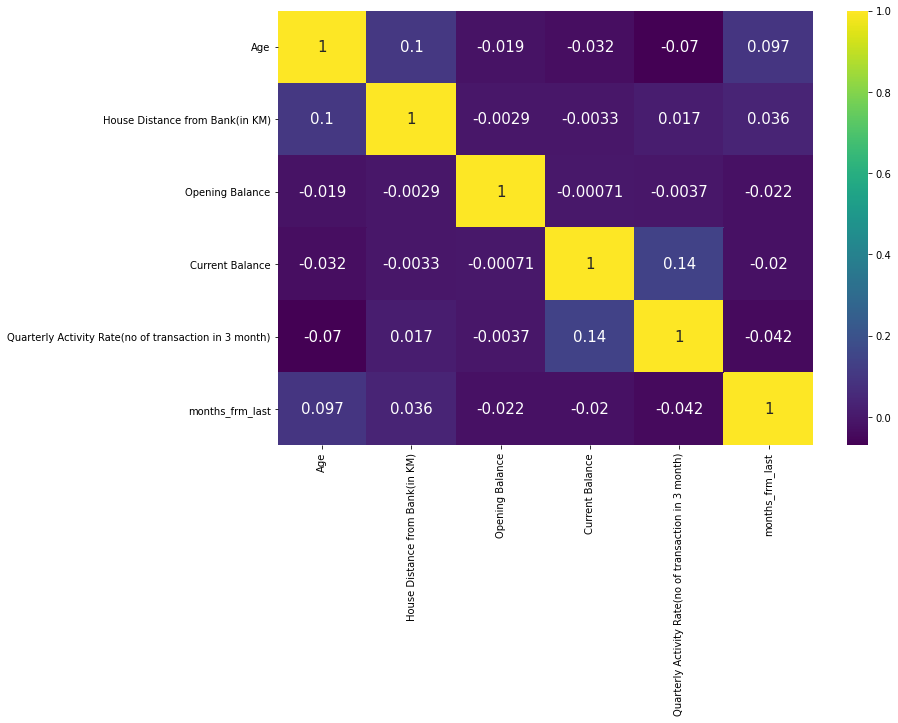

In [20]:
plt.figure(figsize=(12,8))
#sns.set(font_scale=1)
sns.heatmap(df.corr(),cmap='viridis',annot=True,annot_kws={"size": 15})

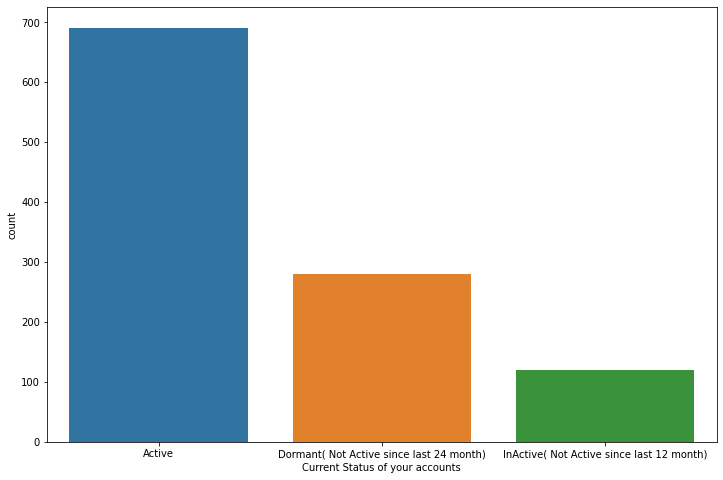

In [21]:
######### out put variable #######
plt.figure(figsize=(12,8))
sns.countplot(x= 'Current Status of your accounts',data=df)

In [22]:
df['Current Status of your accounts'].value_counts()

df['target'] = df['Current Status of your accounts'].map({'Active':0,'Dormant( Not Active since last 24 month)':1,'InActive( Not Active since last 12 month)':2})


In [23]:
df2 = df.rename(columns={'Education qualification': 'education', 'Account Type': 'act_type','Current City':'crnt_city','House Distance from Bank(in KM)':'distance',
                         'Opening Balance':'op_blnce','Having Minimum Balance':'min_blnce','Current Balance':'crnt_blnce',
                         'Quarterly Activity Rate(no of transaction in 3 month)':'3m_trans','Do you have multiple account':'multiple_acnts',
                         'Do you have an active  loan ':'active_loan','Do you have Internet Banking or mobile banking with this  account':'int_banking',
                         'Do you have active Credit Card with this account':'credit_card','Did any suspicious transaction reported in your account':'susp_trans',
                         'Have you ever defaulted any loan payment':'loan_default','Are you satisfied with the service provided by bank':'cust_ser_satisfaction',
                         'Current Status of your accounts':'current_status','Received any service call from bank  in 24 month with reference to  your account.':'service_calls_rec',
                         ' Transaction done in 24 month':'24m_trans','Do you have recent closed Loan ':'recent_closed_loan',
                         'Do you have the Demat account associated to this account.':'demat_acnt'})
df2.columns

Index(['Gender', 'Age', 'education', 'Occupation', 'act_type', 'City',
       'Branch', 'crnt_city', 'distance', 'op_blnce', 'min_blnce',
       'crnt_blnce', '3m_trans', 'multiple_acnts', 'active_loan',
       'int_banking', 'credit_card', 'susp_trans', 'loan_default',
       'cust_ser_satisfaction', 'current_status', 'service_calls_rec',
       '24m_trans', 'recent_closed_loan', 'demat_acnt', 'months_frm_last',
       'target'],
      dtype='object')

In [24]:
(df2.isnull().sum().sort_values(ascending=False)/1090)*100



3m_trans                 42.660550
months_frm_last          39.633028
service_calls_rec        22.201835
demat_acnt                7.155963
recent_closed_loan        7.064220
24m_trans                 1.009174
Branch                    0.458716
Occupation                0.183486
education                 0.183486
act_type                  0.183486
active_loan               0.091743
min_blnce                 0.091743
multiple_acnts            0.091743
int_banking               0.091743
cust_ser_satisfaction     0.091743
distance                  0.091743
crnt_city                 0.000000
City                      0.000000
Age                       0.000000
target                    0.000000
op_blnce                  0.000000
crnt_blnce                0.000000
credit_card               0.000000
susp_trans                0.000000
loan_default              0.000000
current_status            0.000000
Gender                    0.000000
dtype: float64

In [25]:
# 'City','Branch', 'crnt_city',

num_cols = ['Age','distance', 'op_blnce','crnt_blnce', '3m_trans','months_frm_last']
cat_cols =['Gender','education', 'Occupation', 'act_type', 'multiple_acnts', 'active_loan',
           'int_banking', 'credit_card', 'susp_trans', 'loan_default','cust_ser_satisfaction',
           'service_calls_rec','24m_trans', 'recent_closed_loan', 'demat_acnt']

cat_cols2 =['Occupation', 'act_type','24m_trans', 'recent_closed_loan', 'demat_acnt']


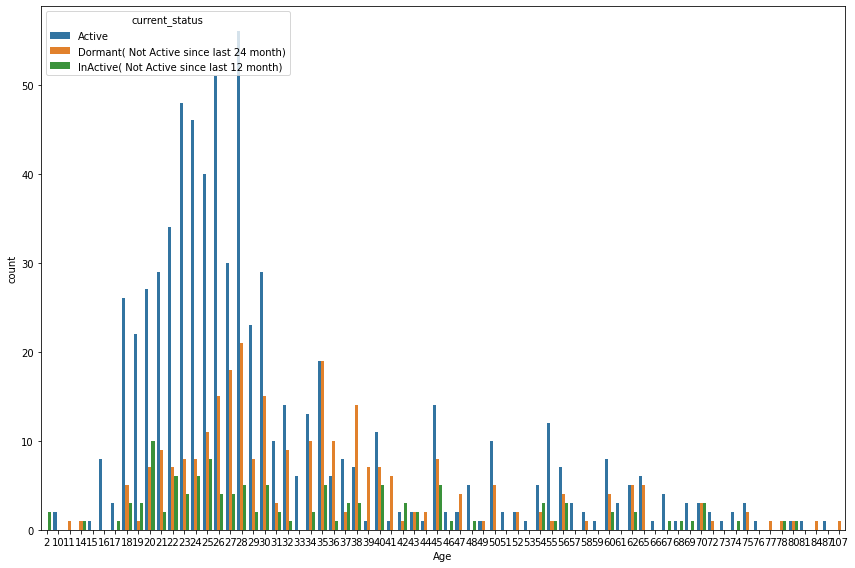

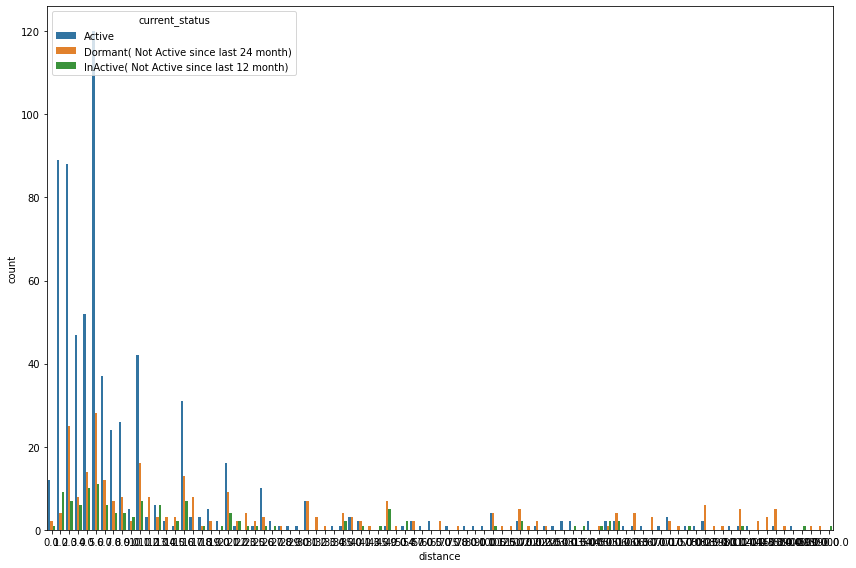

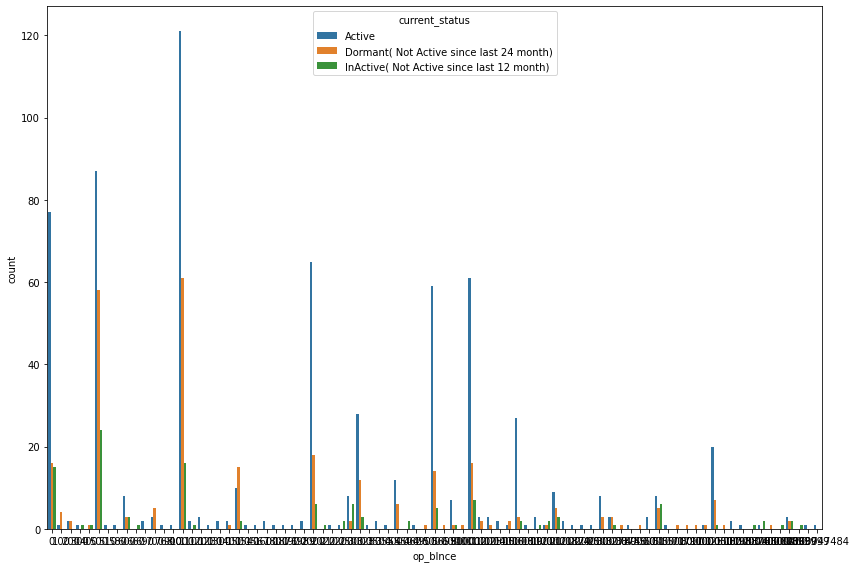

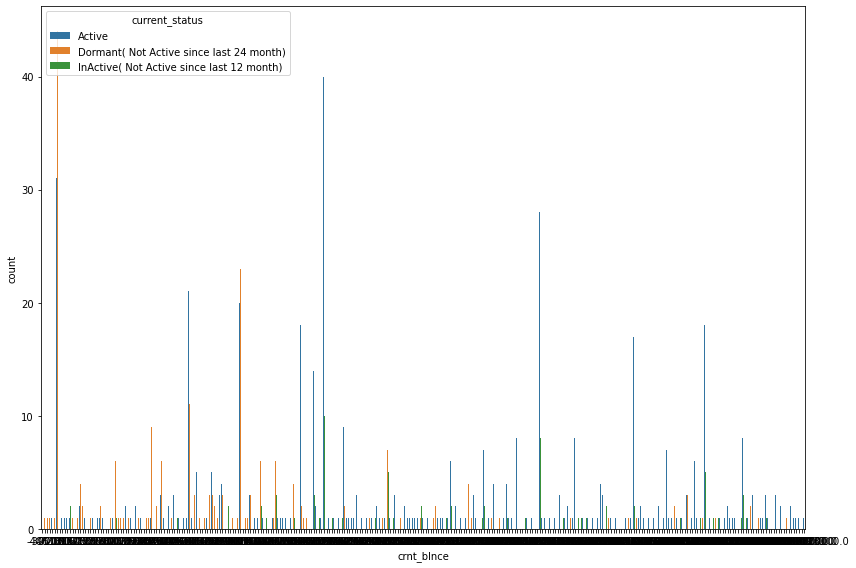

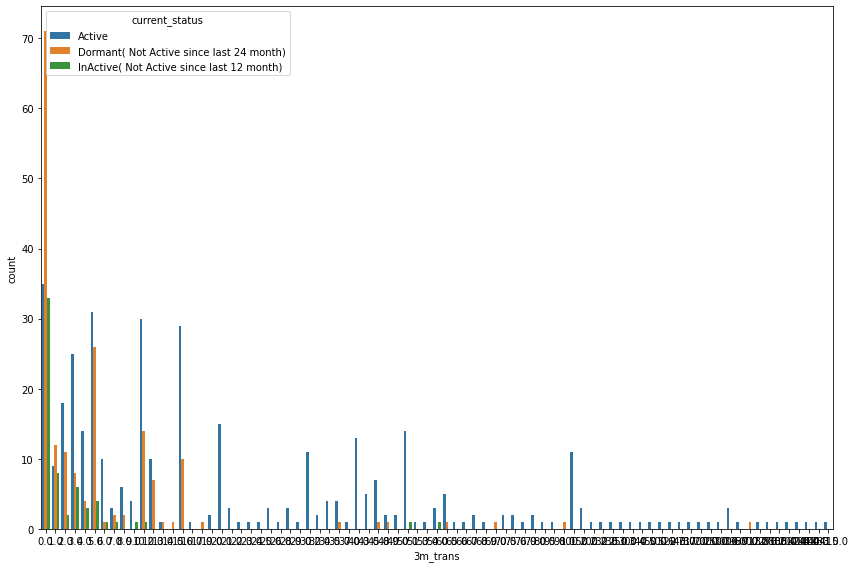

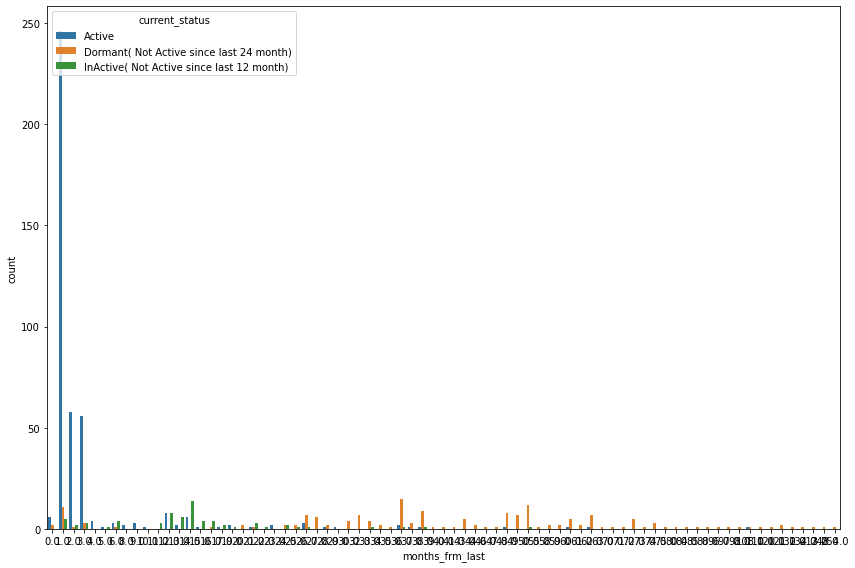

In [26]:
for item in num_cols:
  plt.figure(figsize=(12,8))
  sns.countplot(data=df2,x=item,hue='current_status')
  #sns.countplot(data=df2,x='current_status',hue=item)
  plt.tight_layout()
  plt.show()

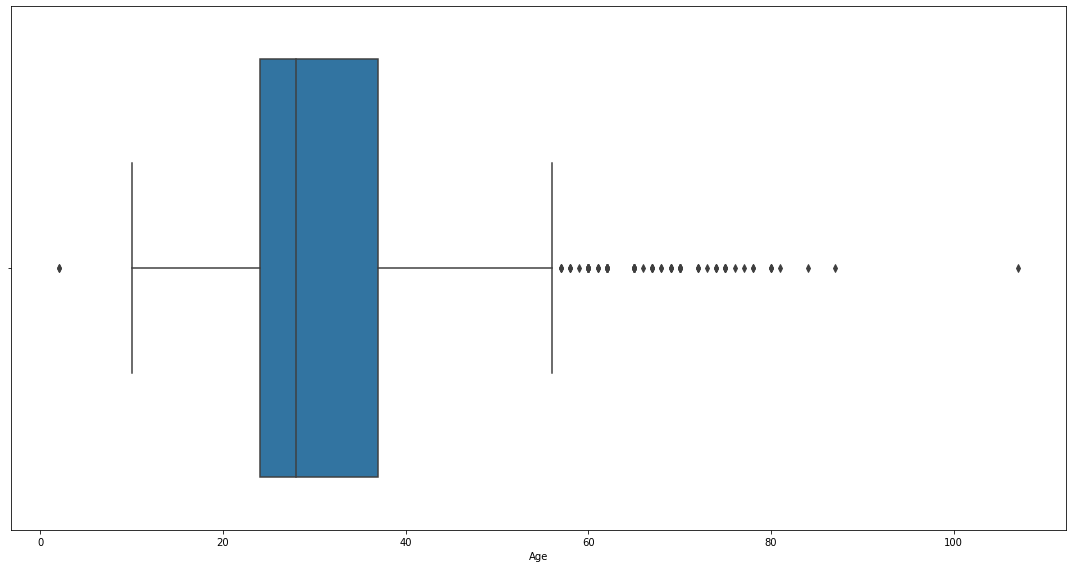

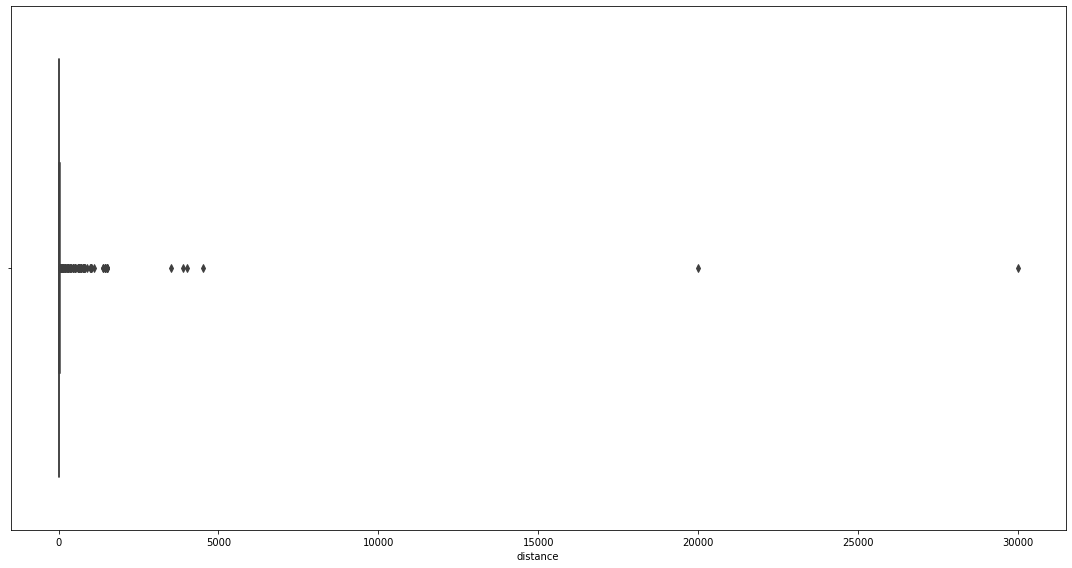

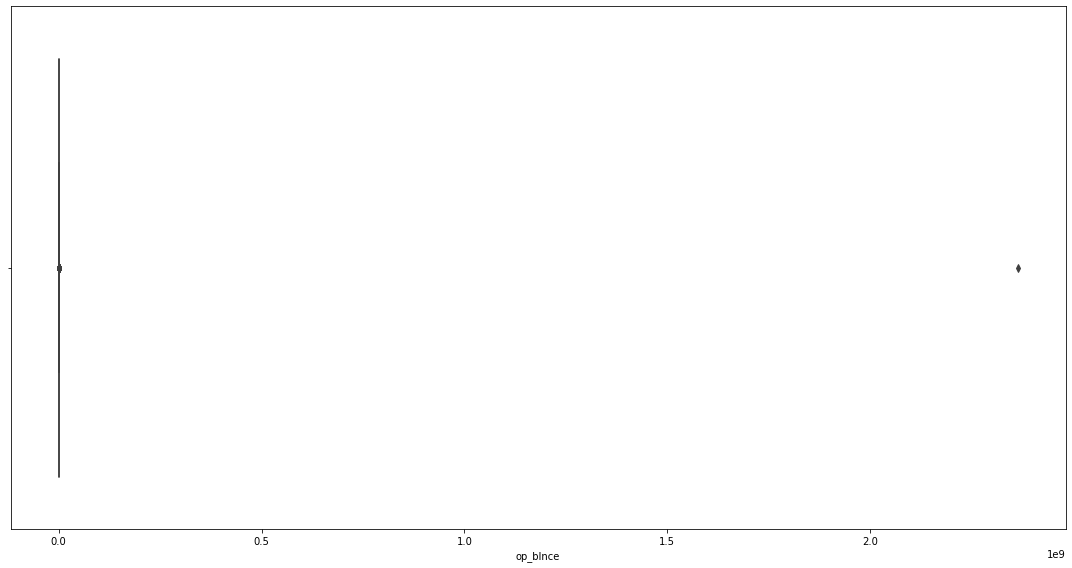

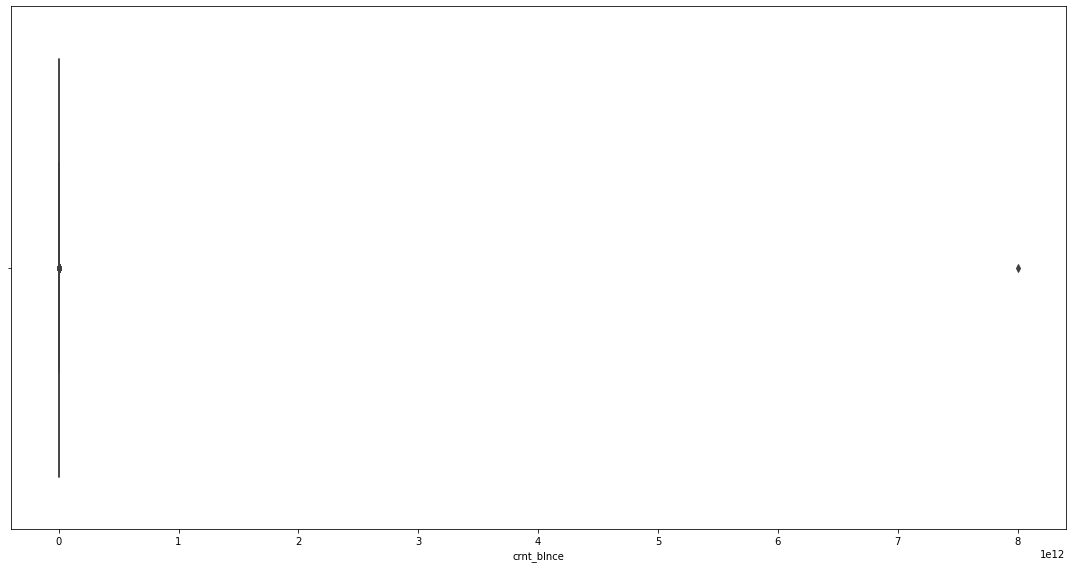

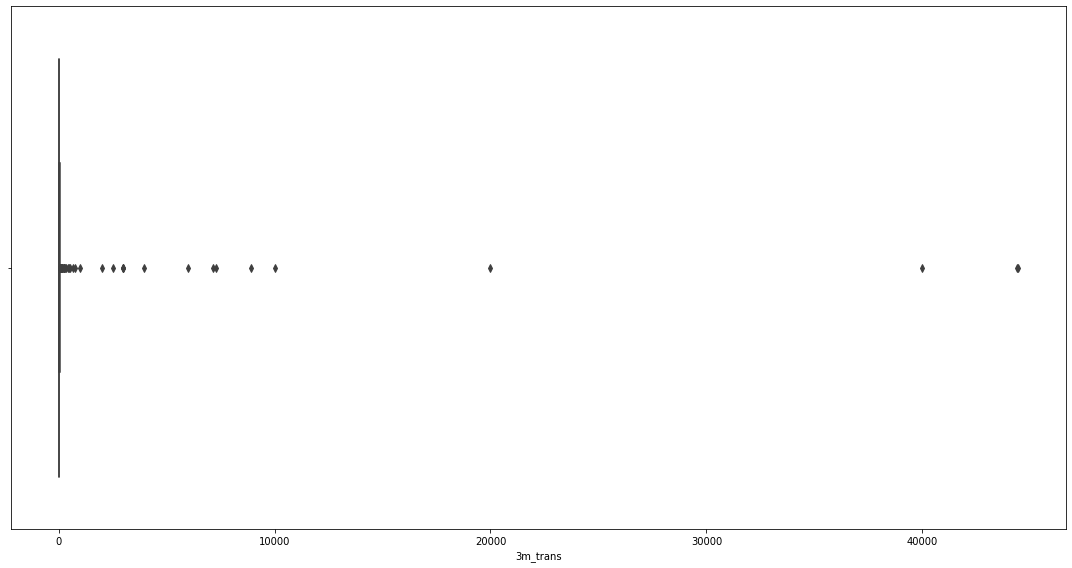

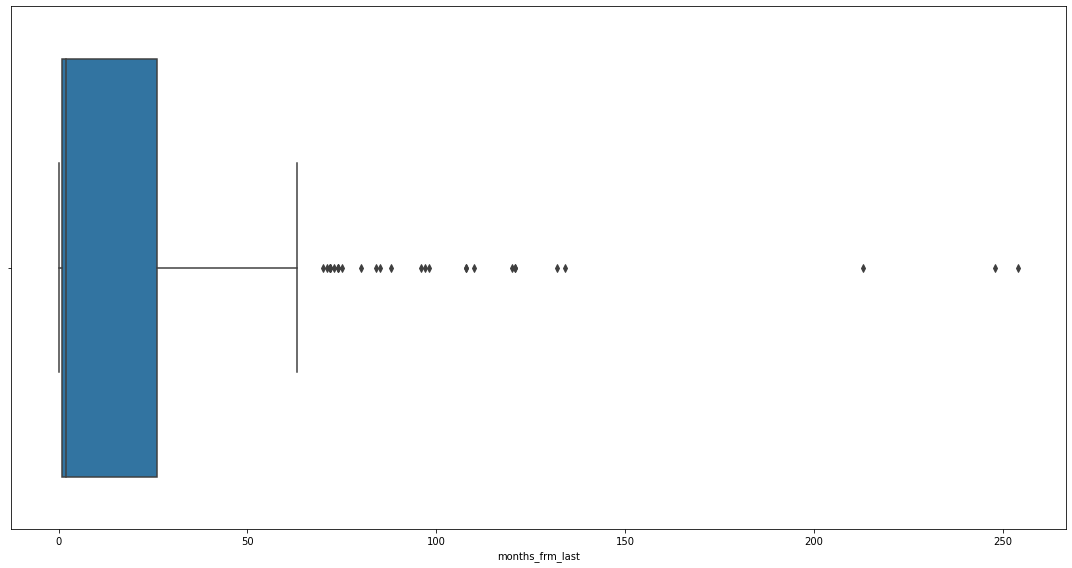

In [27]:
for item in num_cols:
  plt.figure(figsize=(15,8))
  sns.boxplot(data = df2, x=item)
  plt.tight_layout()
  plt.show()

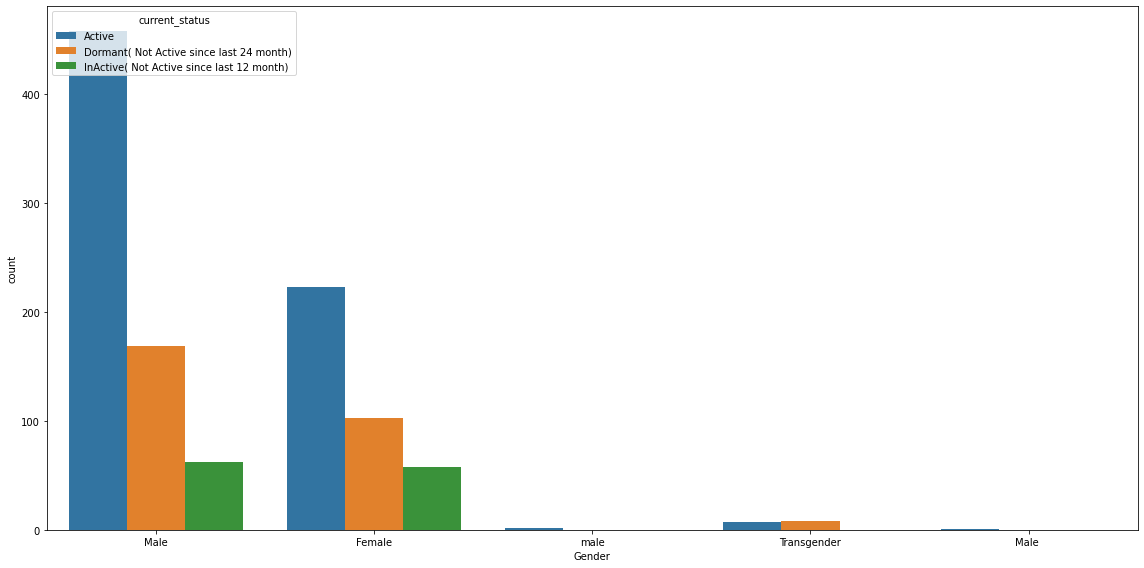

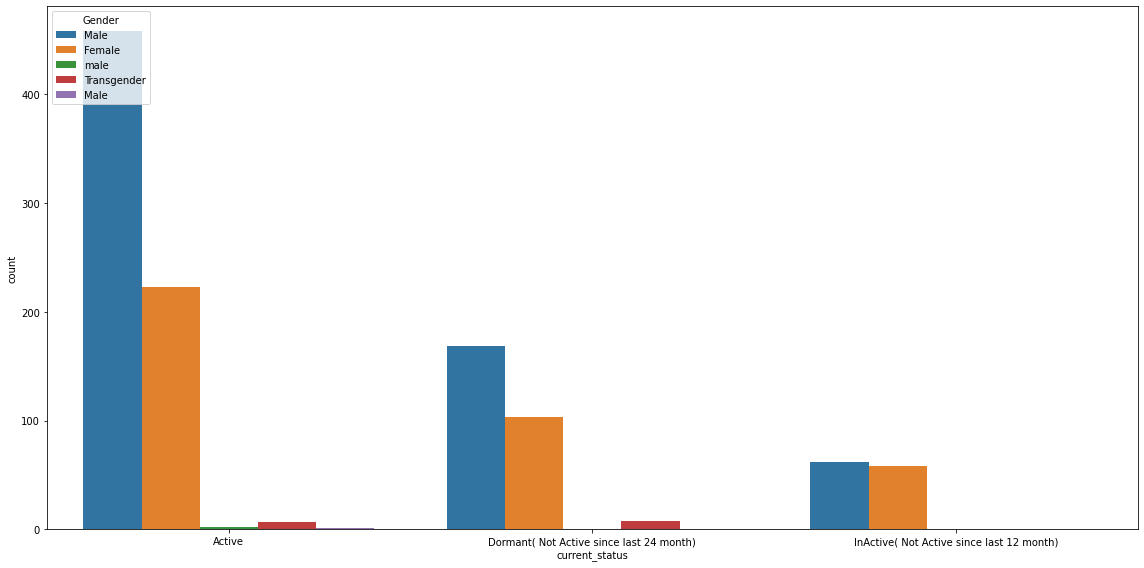

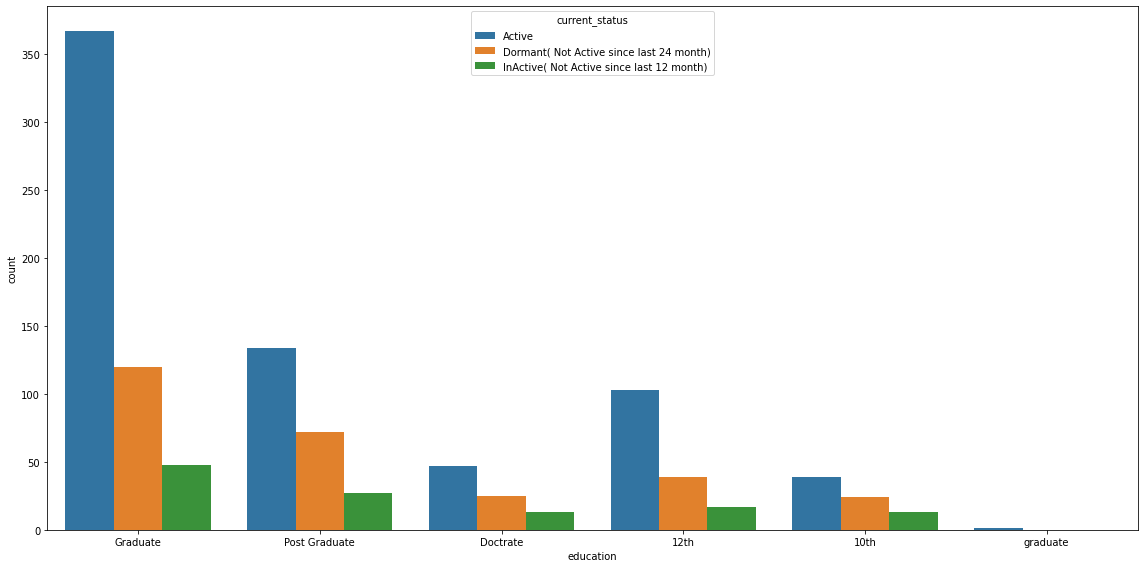

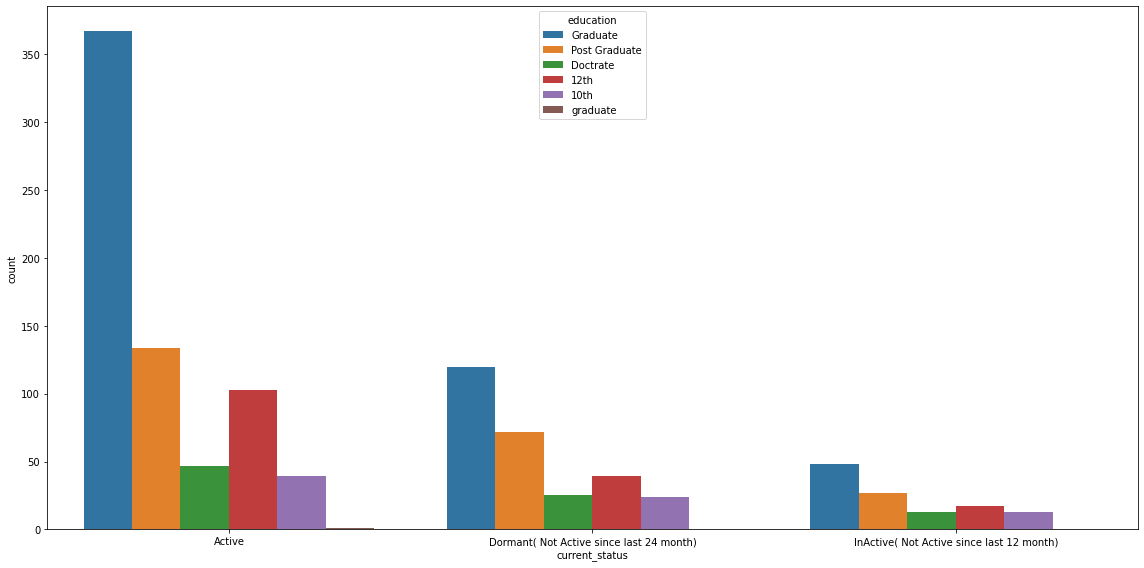

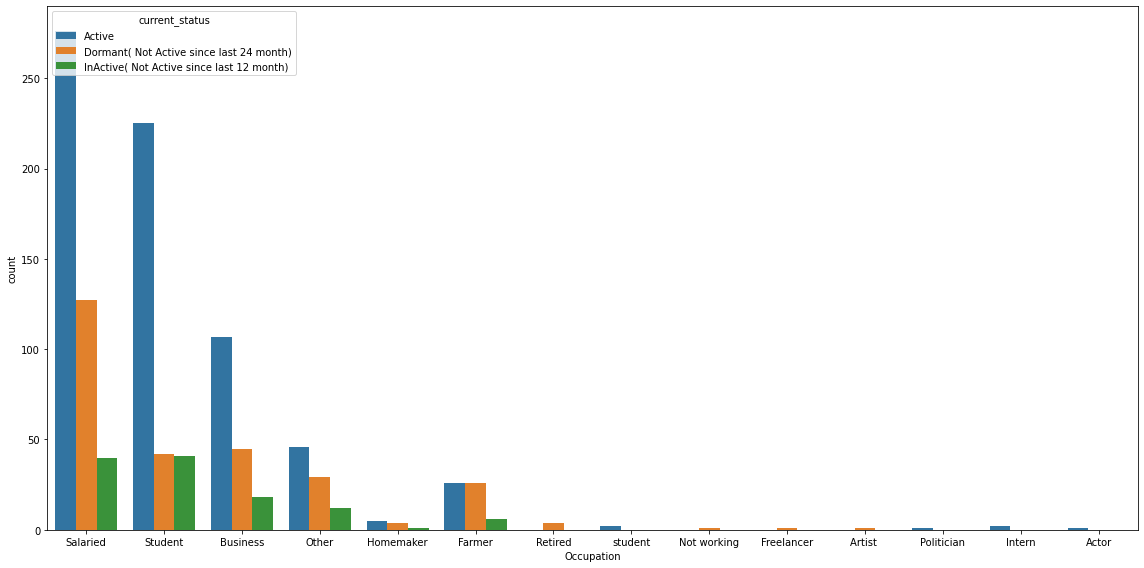

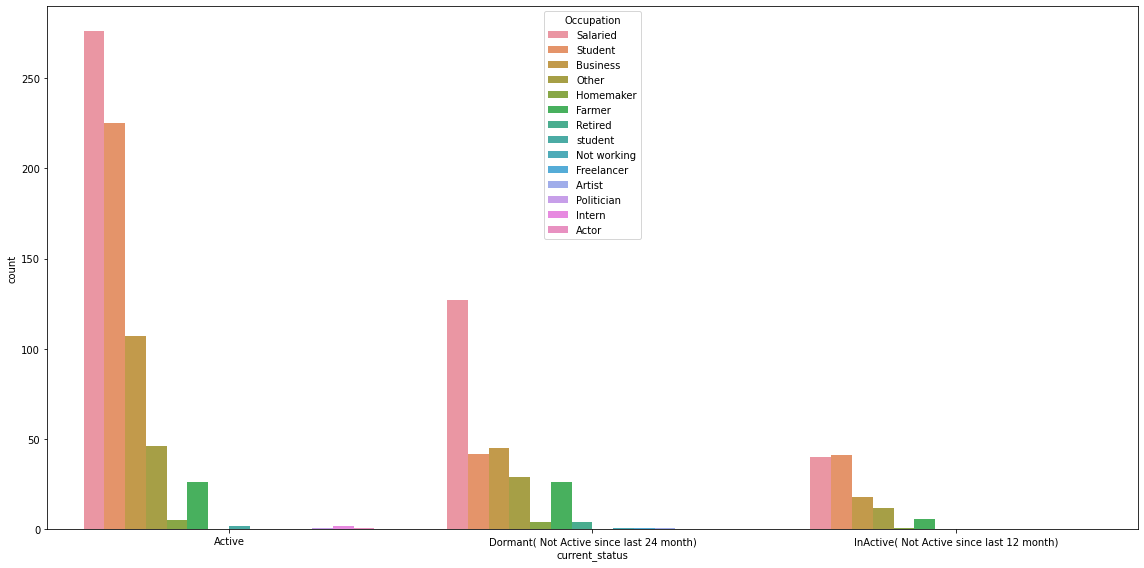

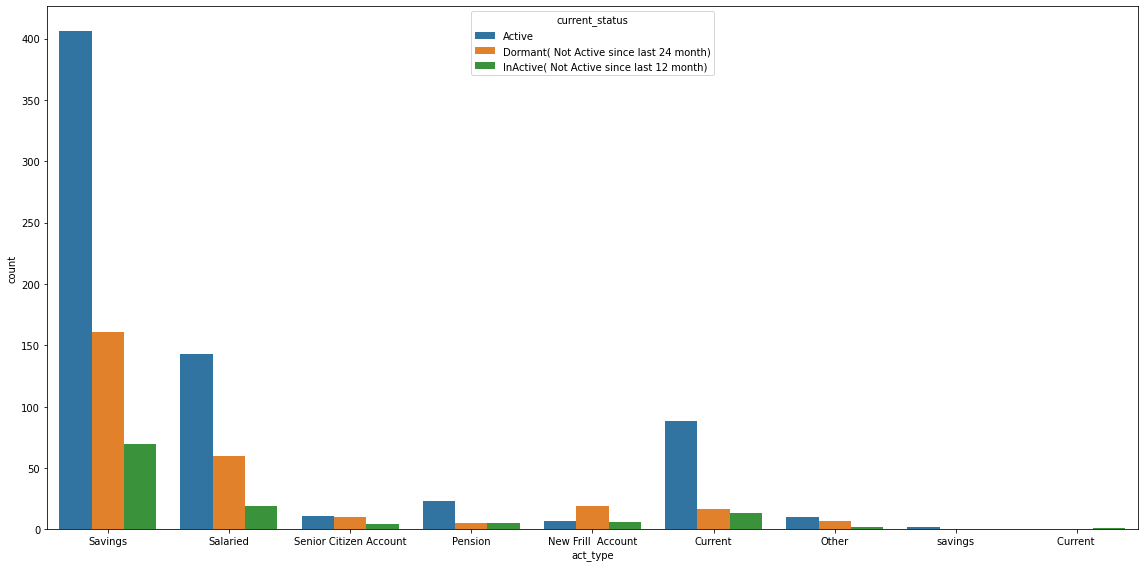

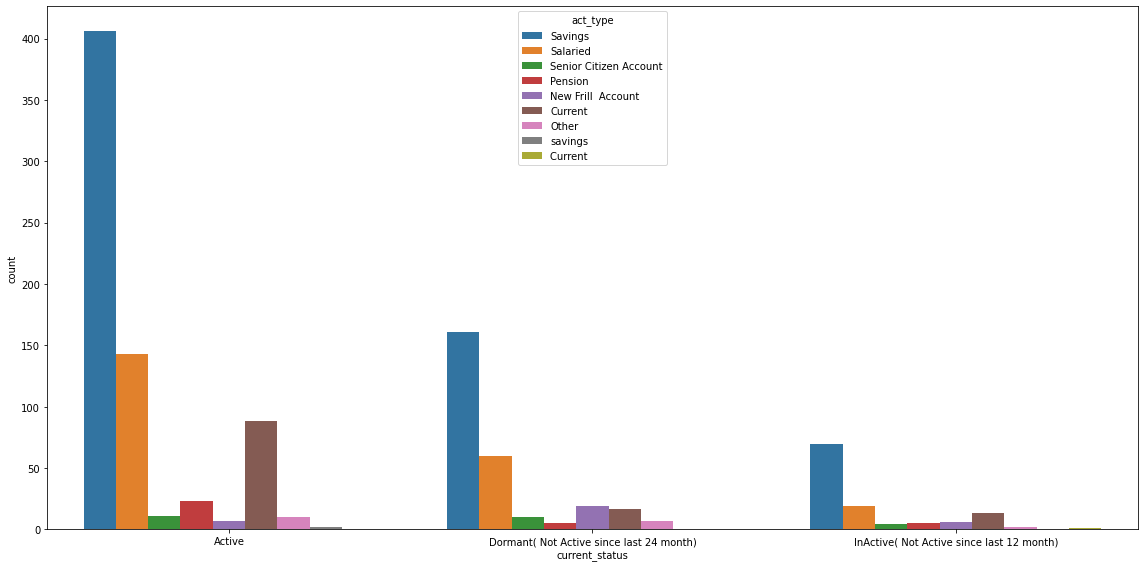

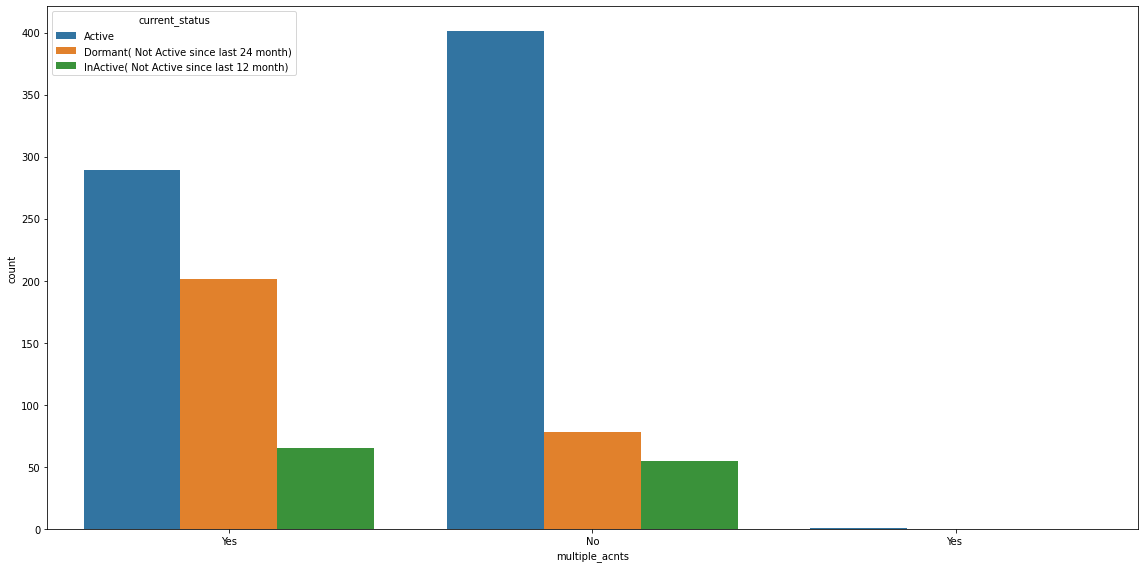

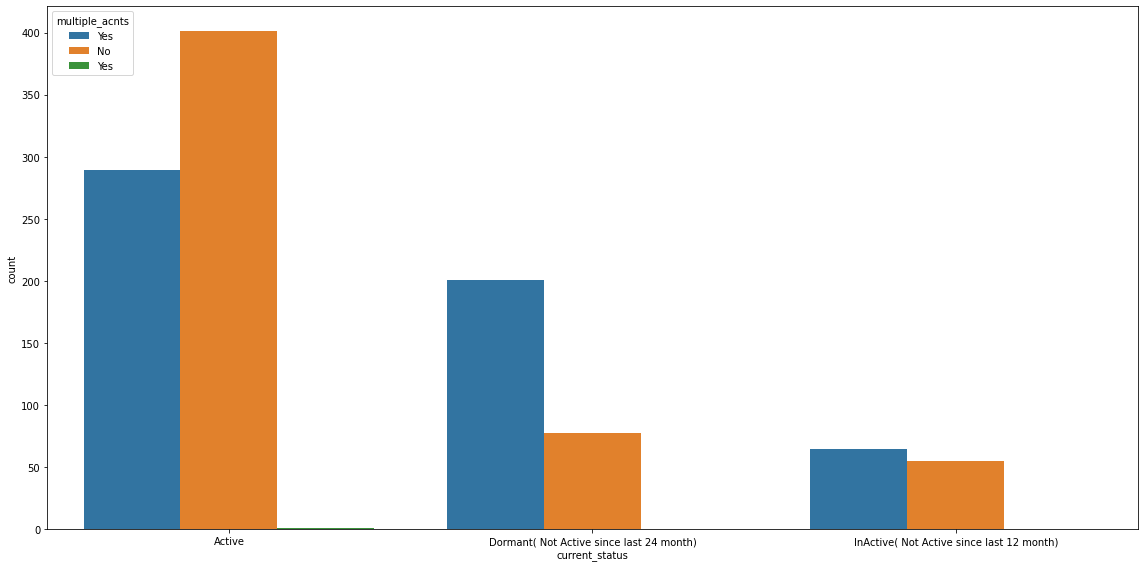

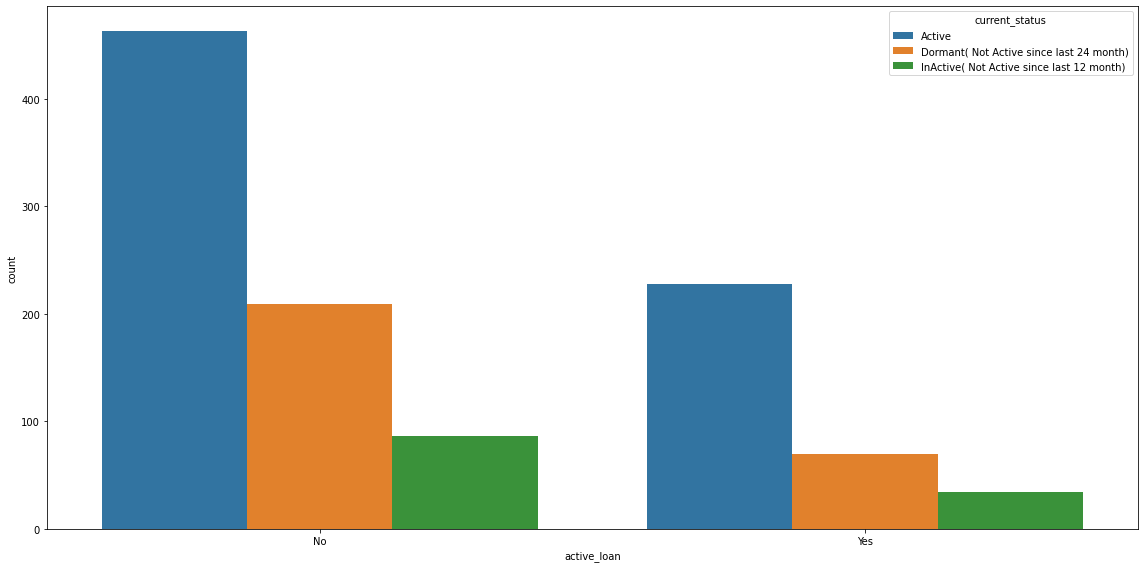

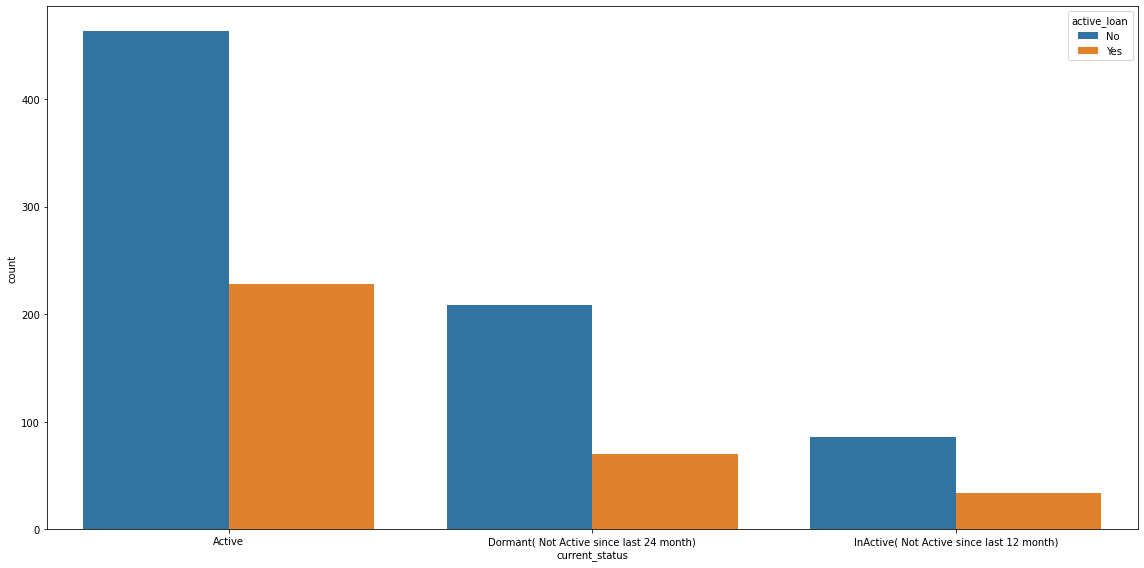

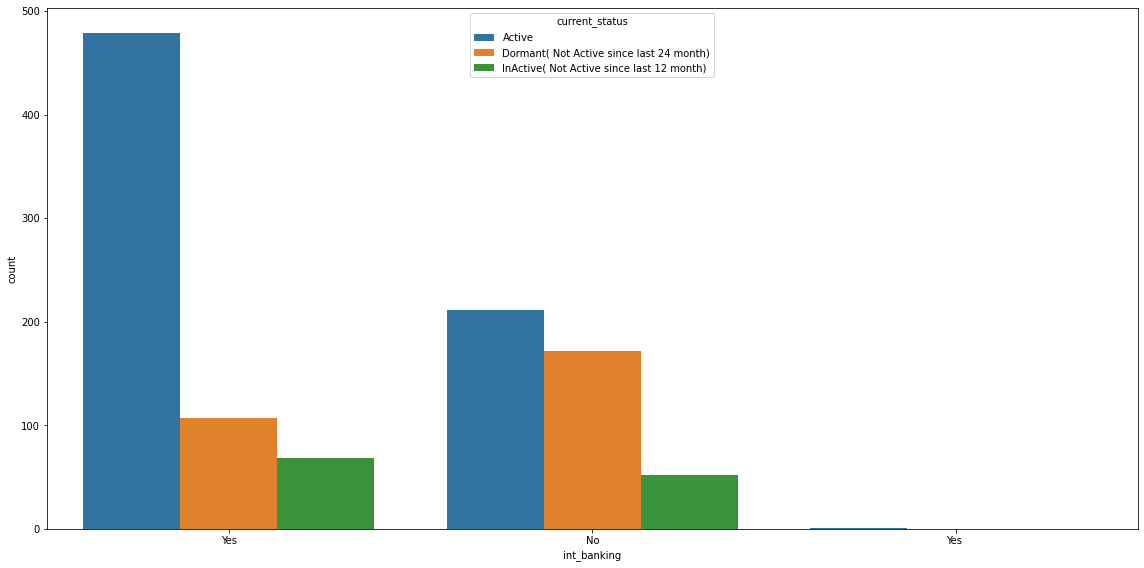

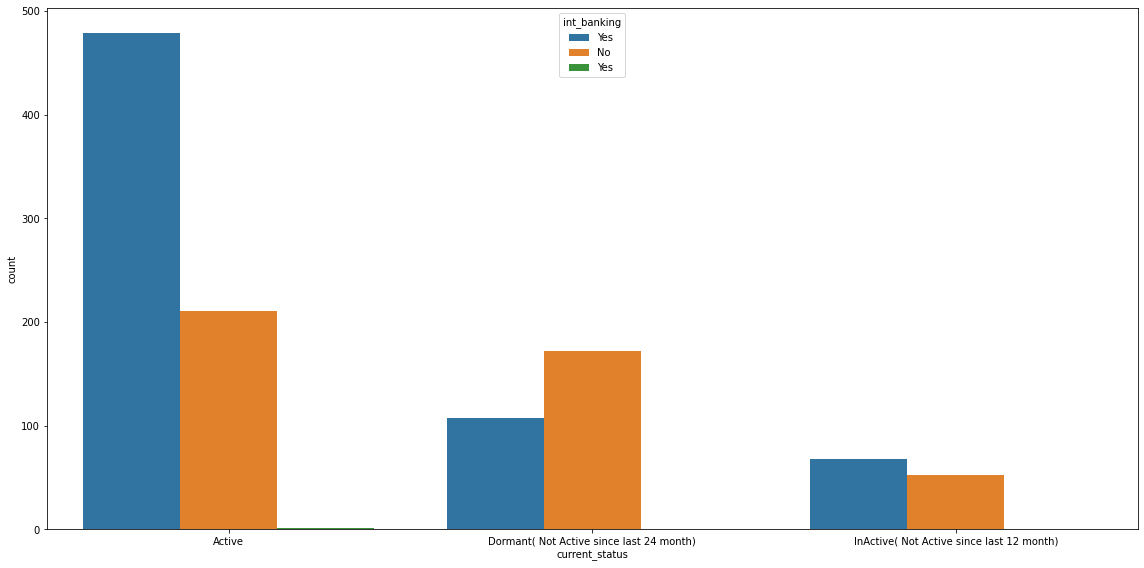

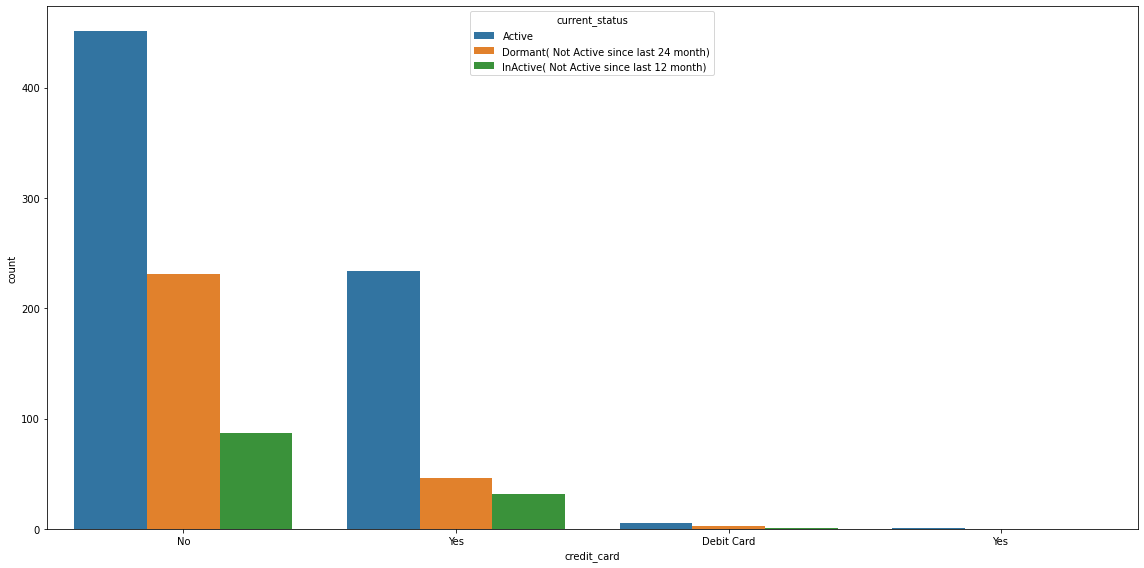

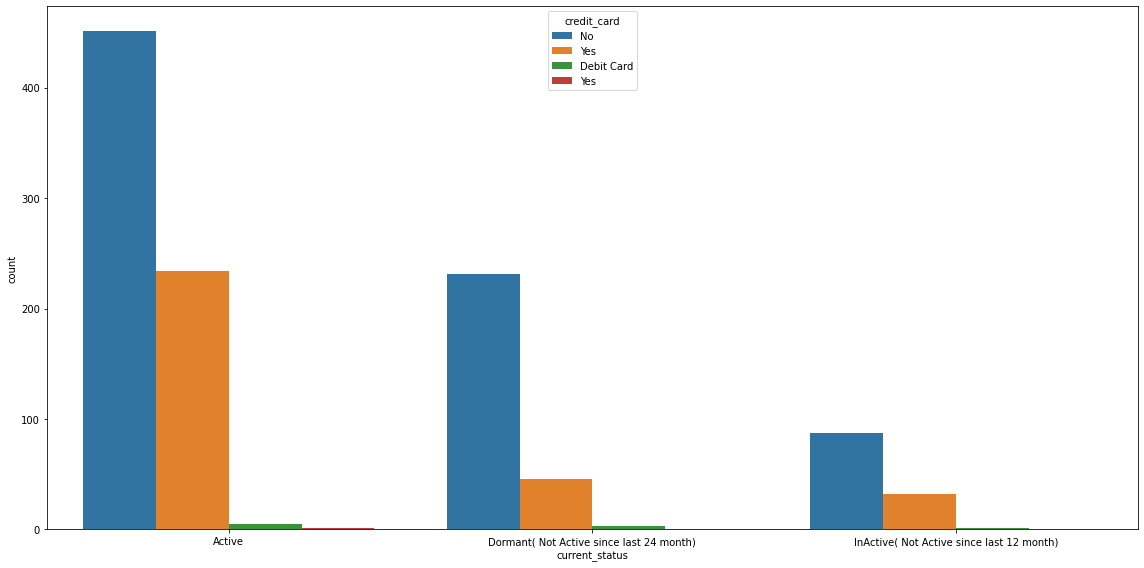

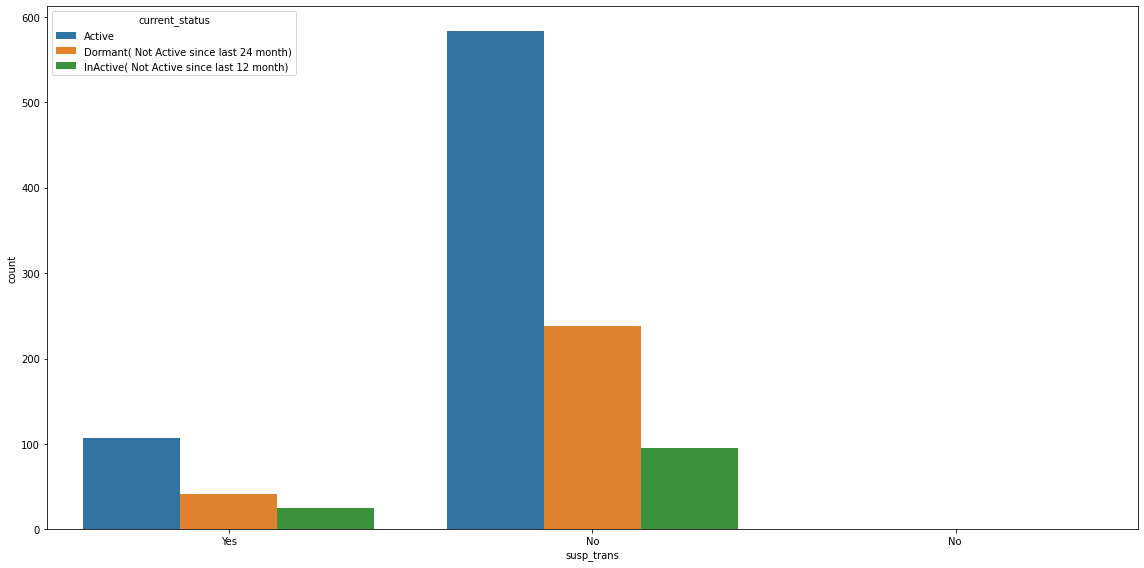

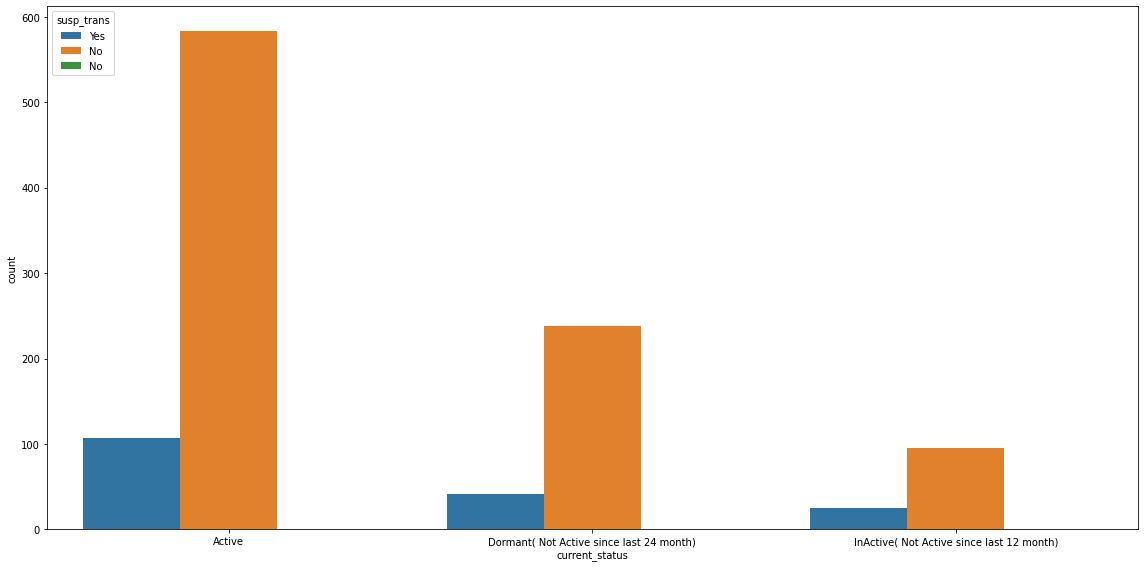

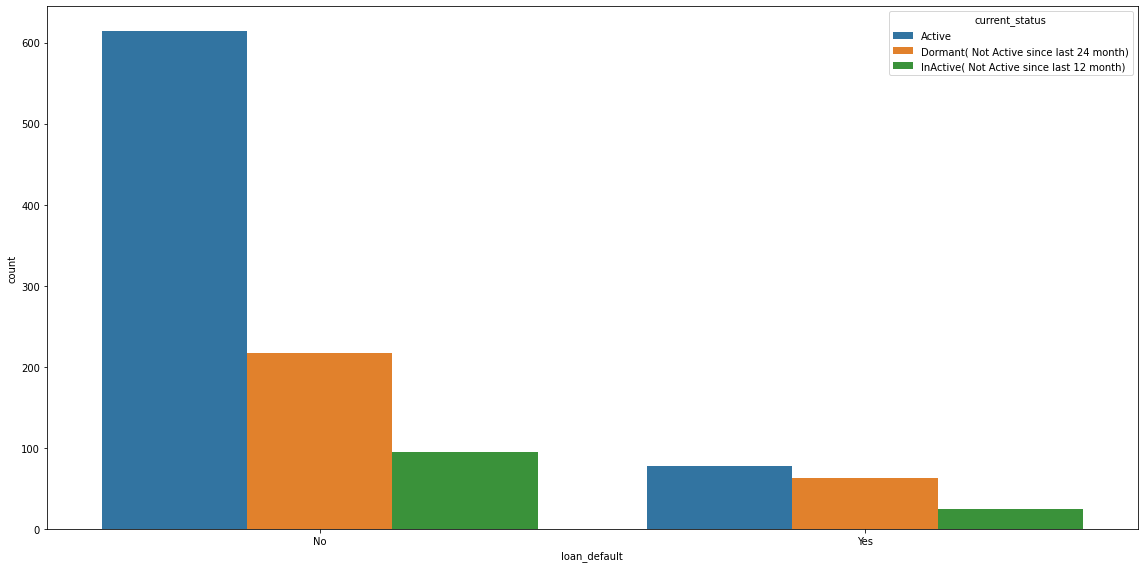

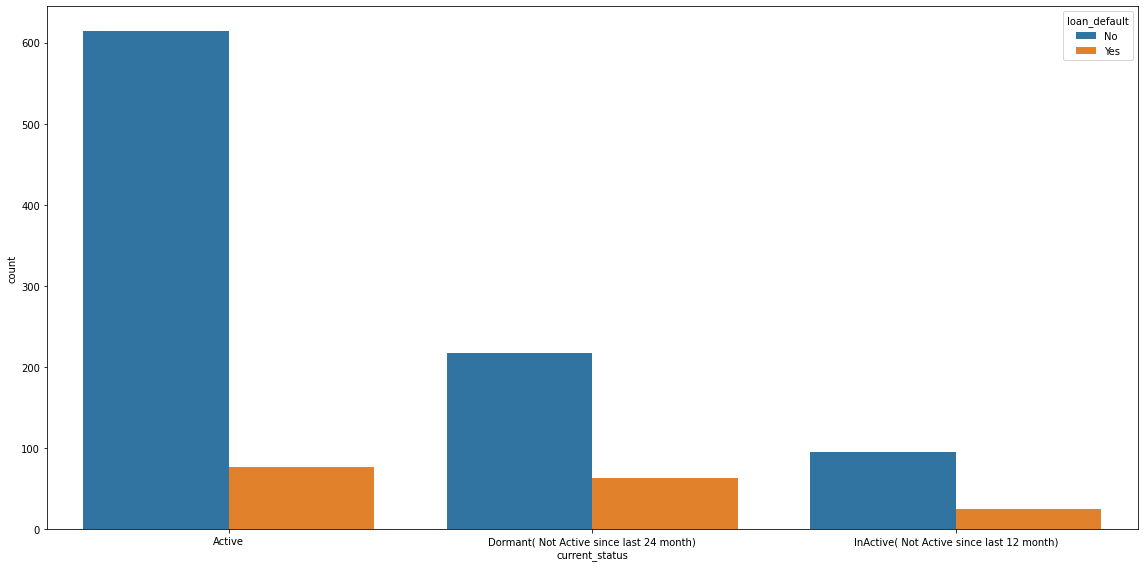

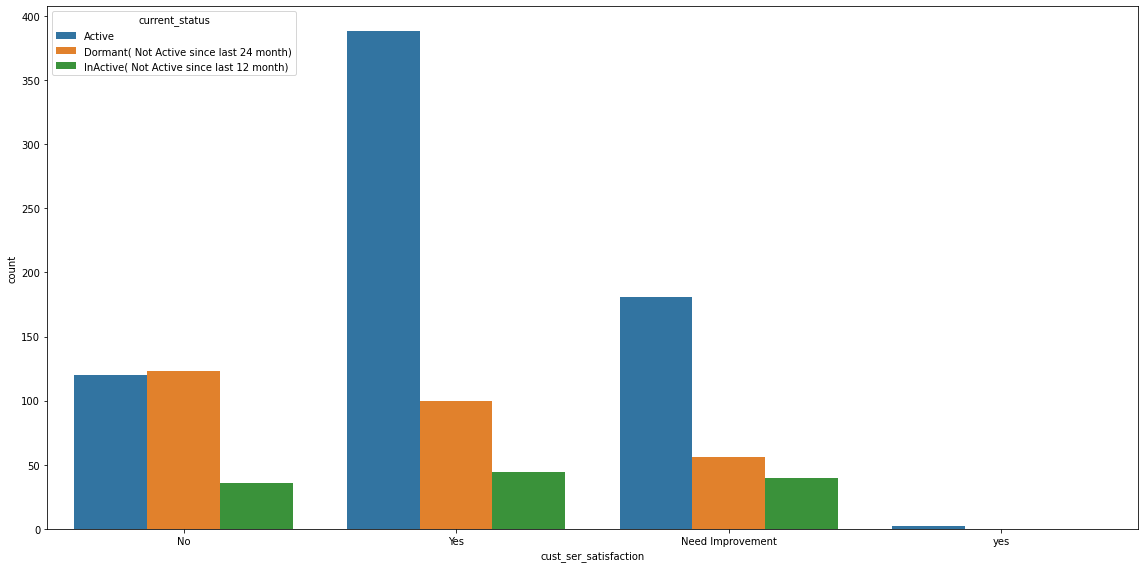

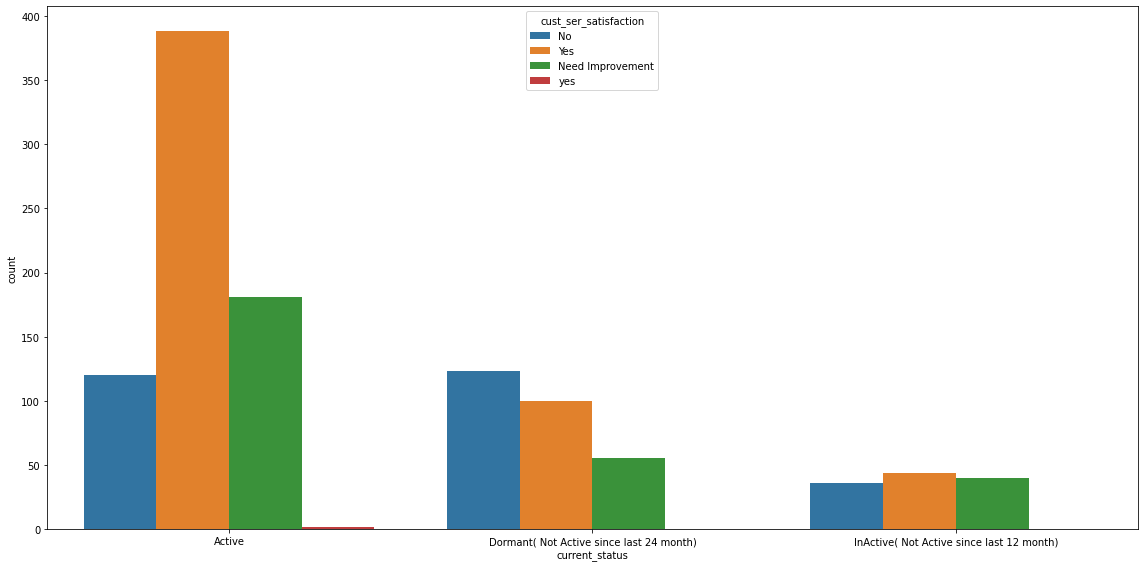

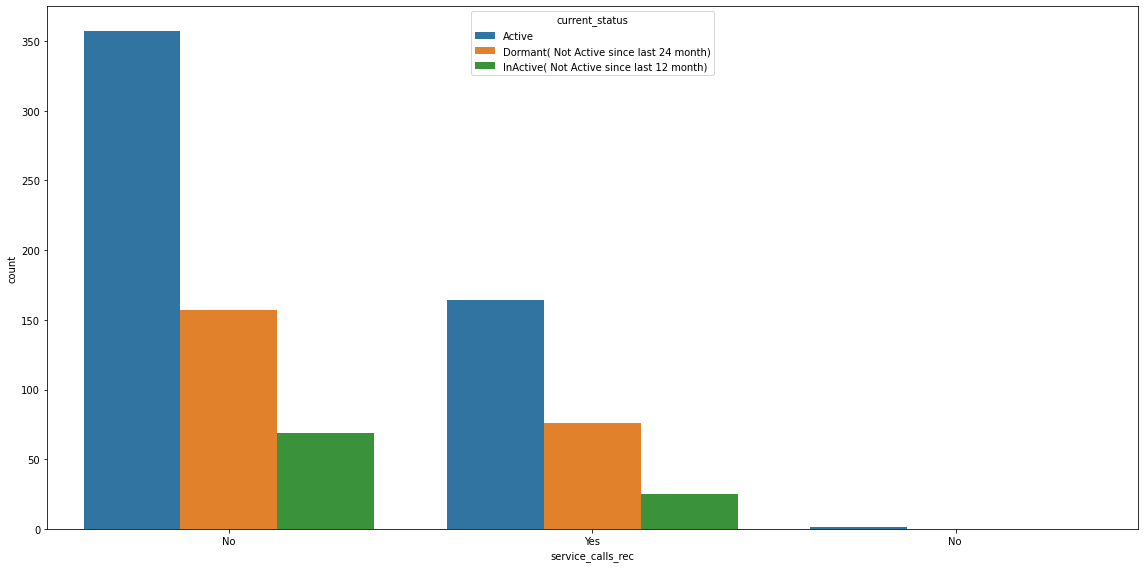

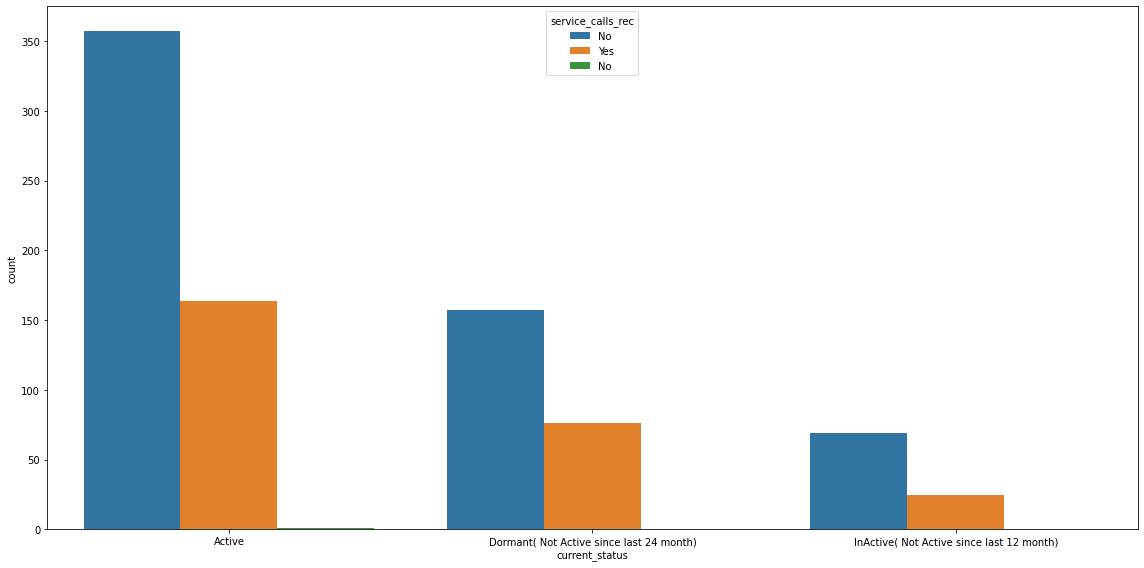

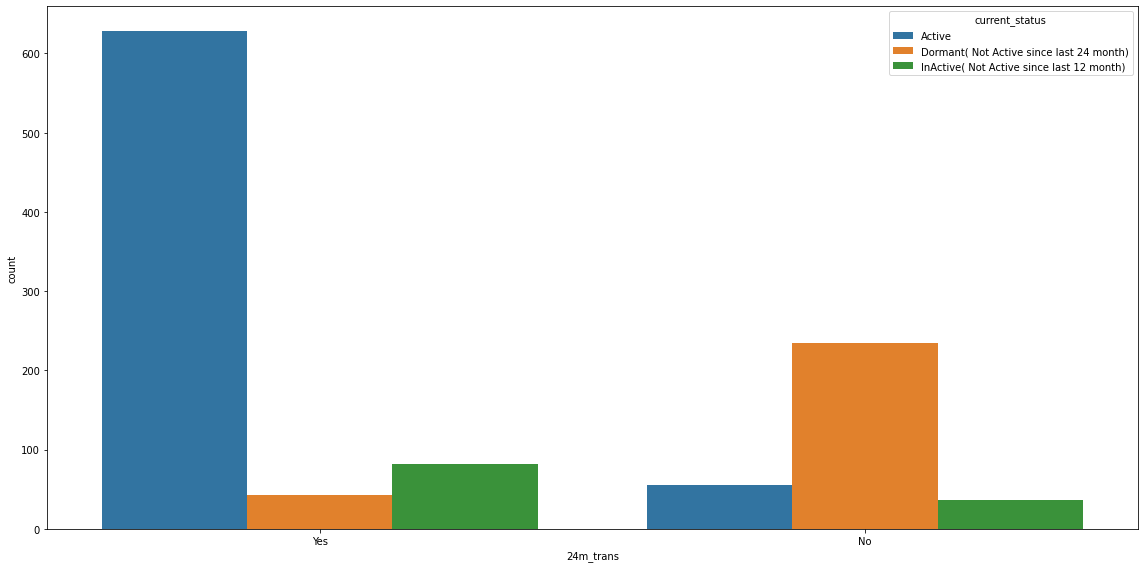

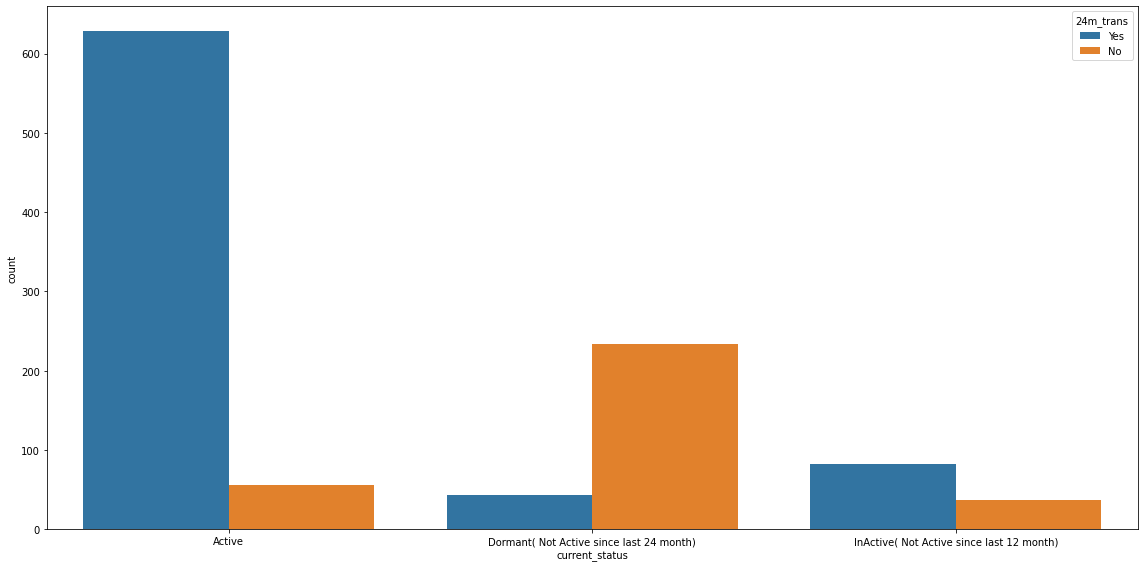

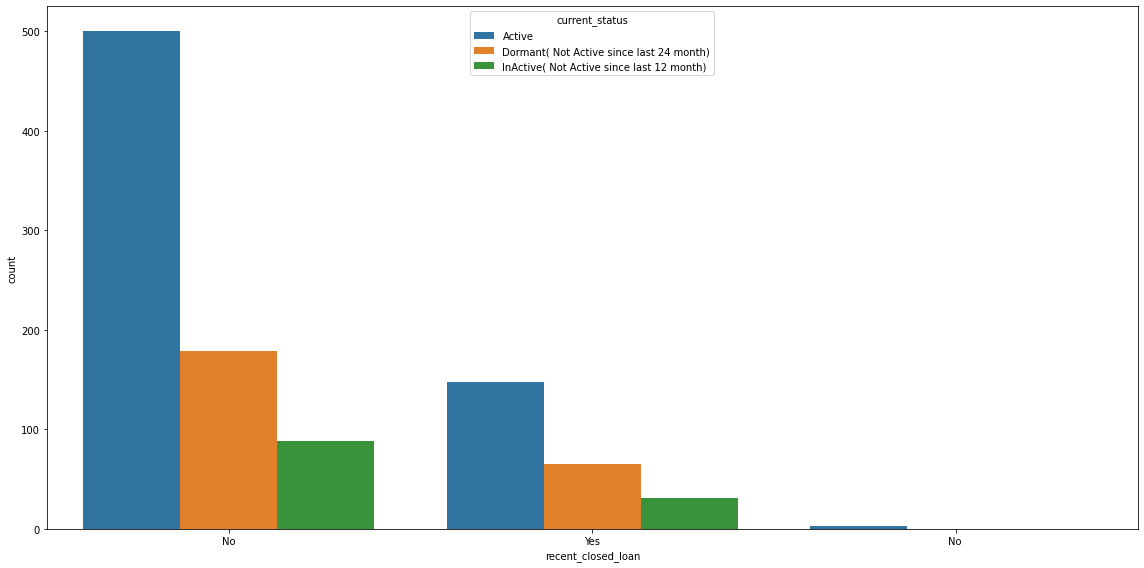

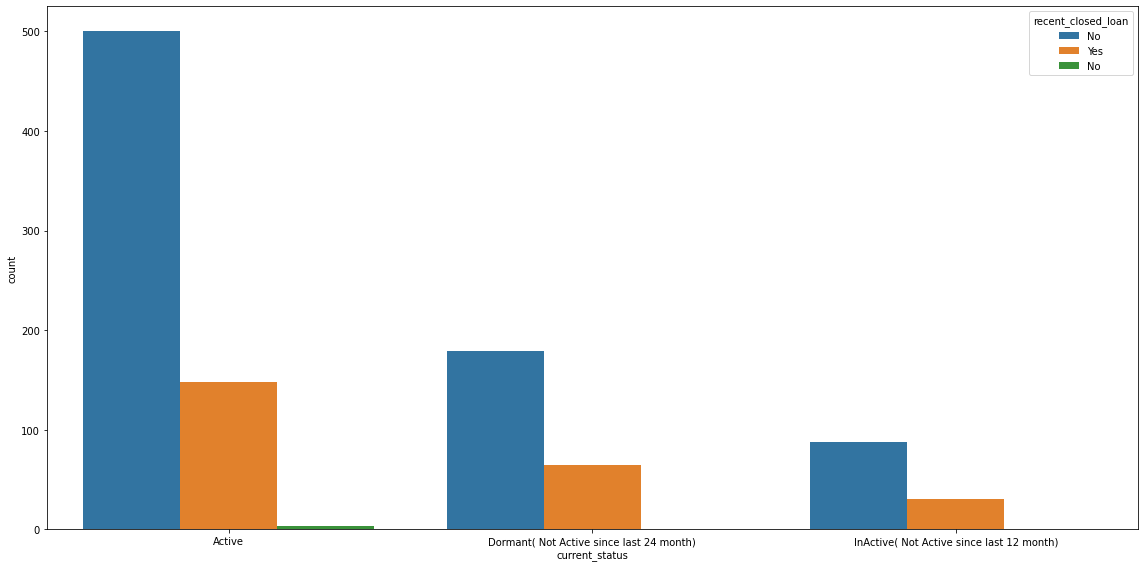

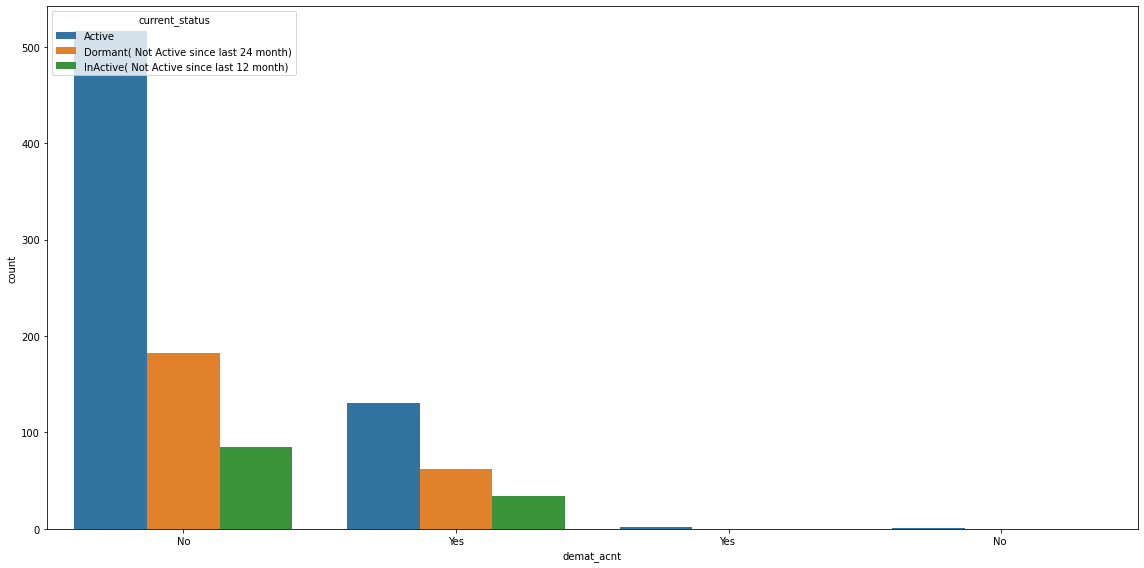

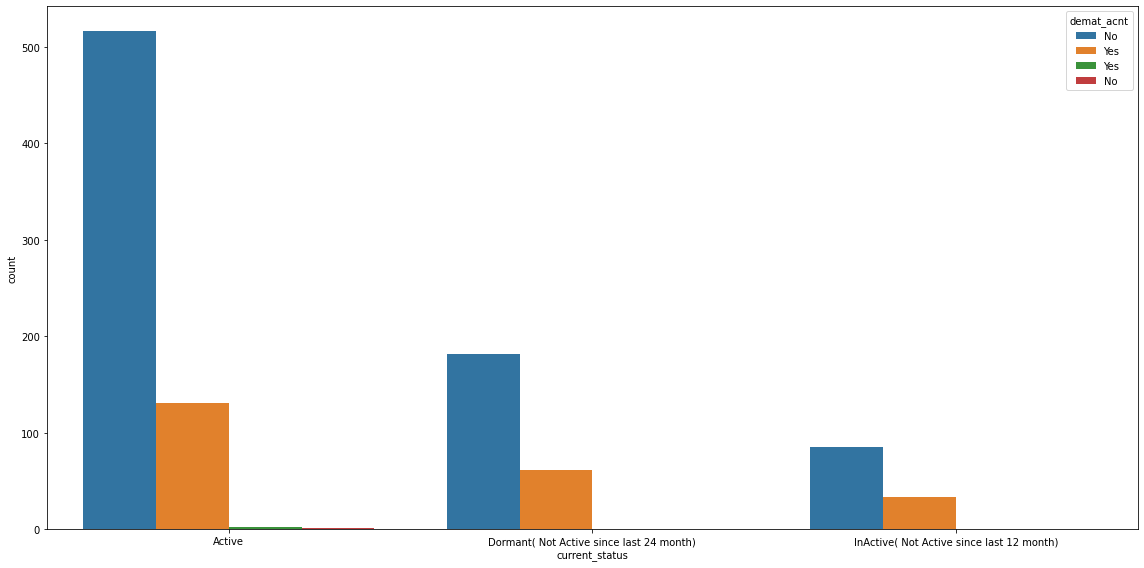

In [28]:
for item in cat_cols:
  plt.figure(figsize=(16,8))
  sns.countplot(data=df2,x=item,hue='current_status')
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(16,8))
  sns.countplot(data=df2,x='current_status',hue=item)
  plt.tight_layout()
  plt.show()


# Hypothesis Tesing 

In [29]:
# Ho: No relationship exists between Feature and Y
# Ha: There exists a relationshop between Feature and Y

from scipy import stats

In [30]:
cat_cols

['Gender',
 'education',
 'Occupation',
 'act_type',
 'multiple_acnts',
 'active_loan',
 'int_banking',
 'credit_card',
 'susp_trans',
 'loan_default',
 'cust_ser_satisfaction',
 'service_calls_rec',
 '24m_trans',
 'recent_closed_loan',
 'demat_acnt']

In [31]:
pd.crosstab(df2['Gender'],df2['current_status']).values

array([[223, 103,  58],
       [458, 169,  62],
       [  1,   0,   0],
       [  7,   8,   0],
       [  2,   0,   0]])

In [32]:
stats.chi2_contingency(pd.crosstab(df2['Gender'],df2['current_status']))

(20.20667832360779,
 0.009581769922090854,
 8,
 array([[2.43211732e+02, 9.85517874e+01, 4.22364803e+01],
        [4.36387718e+02, 1.76828598e+02, 7.57836847e+01],
        [6.33363886e-01, 2.56645280e-01, 1.09990834e-01],
        [9.50045830e+00, 3.84967919e+00, 1.64986251e+00],
        [1.26672777e+00, 5.13290559e-01, 2.19981668e-01]]))

In [33]:
p_val = []
feat = []
#feat_NA = []
chi_verdict = []
chi_cond = []
act_cond = []

for col in cat_cols:
  test = pd.crosstab(df2[col],df2['current_status'])
  #print('Obs_values:',test.values)
  y = stats.chi2_contingency(test)
  size = (np.shape(y[3])[0])*(np.shape(y[3])[1])
  test = np.array(test)
  s = 100*(len(np.where(test<5)[0])/size)
  act_cond.append(s)
  #print('Exp_values:',y[3])
  z = y[3]
  ratio = 100*(len(np.where(z< 5)[0])/size)
  chi_cond.append(round(ratio,1))
  p_val.append(round(y[1],3))
  if y[1] >0.05:
    chi_verdict.append("Failed to reject_[Go with Null_Hyp]")
  else:
    chi_verdict.append("Reject_Null[Go with Alt_hyp]")
Chi_Sq = pd.DataFrame([cat_cols, p_val, chi_verdict,act_cond,chi_cond]).T
Chi_Sq.columns = 'Feature', 'p_value', 'Null_Hypothesis','Actual_<5c','Predict_<5c'

Chi_Sq


,Feature,p_value,Null_Hypothesis,Actual_<5c,Predict_<5c
0,Gender,0.01,Reject_Null[Go with Alt_hyp],46.6667,53.3
1,education,0.038,Reject_Null[Go with Alt_hyp],16.6667,16.7
2,Occupation,0,Reject_Null[Go with Alt_hyp],61.9048,61.9
3,act_type,0,Reject_Null[Go with Alt_hyp],29.6296,40.7
4,multiple_acnts,0,Reject_Null[Go with Alt_hyp],33.3333,33.3
5,active_loan,0.046,Reject_Null[Go with Alt_hyp],0,0
6,int_banking,0,Reject_Null[Go with Alt_hyp],33.3333,33.3
7,credit_card,0,Reject_Null[Go with Alt_hyp],41.6667,41.7
8,susp_trans,0.557,Failed to reject_[Go with Null_Hyp],33.3333,33.3
9,loan_default,0,Reject_Null[Go with Alt_hyp],0,0


In [34]:

df2[cat_cols].head()

,Gender,education,Occupation,act_type,multiple_acnts,active_loan,int_banking,credit_card,susp_trans,loan_default,cust_ser_satisfaction,service_calls_rec,24m_trans,recent_closed_loan,demat_acnt
0,Male,Graduate,Salaried,Savings,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No
1,Male,Post Graduate,Salaried,Savings,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No
2,Male,Post Graduate,Salaried,Salaried,Yes,Yes,No,No,No,Yes,No,No,No,NaN,NaN
3,Male,Graduate,Student,Savings,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes
4,Female,Doctrate,Business,Savings,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes


In [35]:

df2['recent_closed_loan'].mode()

df2['demat_acnt'].mode()


0    No
dtype: object

In [36]:
df2['recent_closed_loan']=df2['recent_closed_loan'].fillna("No")
df2['demat_acnt']=df2['demat_acnt'].fillna("No")


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 1091 non-null   object 
 1   Age                    1091 non-null   int64  
 2   education              1089 non-null   object 
 3   Occupation             1089 non-null   object 
 4   act_type               1089 non-null   object 
 5   City                   1091 non-null   object 
 6   Branch                 1086 non-null   object 
 7   crnt_city              1091 non-null   object 
 8   distance               1090 non-null   float64
 9   op_blnce               1091 non-null   int64  
 10  min_blnce              1090 non-null   object 
 11  crnt_blnce             1091 non-null   float64
 12  3m_trans               626 non-null    float64
 13  multiple_acnts         1090 non-null   object 
 14  active_loan            1090 non-null   object 
 15  int_

In [38]:

df2[df2['current_status']=='InActive( Not Active since last 12 month)']['3m_trans']

df2[df2['current_status']=='InActive( Not Active since last 12 month)']['3m_trans'].isnull().sum()


58

In [39]:
df2[df2['current_status']=='Active']['3m_trans'].median() # 12


12.0

In [40]:
df2[df2['current_status']=='Dormant( Not Active since last 24 month)']['3m_trans'].median() # 2


2.0

In [41]:
df2[df2['current_status']=='InActive( Not Active since last 12 month)']['3m_trans'].median() # 0.1


0.0

In [42]:
df2[df2['current_status']=='Active']['3m_trans'].isna().sum()


305

In [43]:
df2[df2['current_status']=='Dormant( Not Active since last 24 month)']['3m_trans'].isna().sum()


102

In [44]:
df2[df2['current_status']=='InActive( Not Active since last 12 month)']['3m_trans'].isna().sum()


58

In [45]:
df2.loc[df2['current_status']=='Active']['3m_trans']


0        2.0
1       30.0
3        5.0
4        5.0
10       NaN
        ... 
1084     9.0
1085    40.0
1086    60.0
1087     9.0
1088    40.0
Name: 3m_trans, Length: 691, dtype: float64

In [46]:

df2.loc[(df2['current_status']=='Active'),['3m_trans']] = df2.loc[(df2['current_status']=='Active'),['3m_trans']].fillna(df2.loc[(df2['current_status']=='Active'),['3m_trans']].median())


In [47]:
df2.loc[df2['current_status']=='Active']['3m_trans']

0        2.0
1       30.0
3        5.0
4        5.0
10      12.0
        ... 
1084     9.0
1085    40.0
1086    60.0
1087     9.0
1088    40.0
Name: 3m_trans, Length: 691, dtype: float64

In [48]:
df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['3m_trans']]


,3m_trans
2,7.0
6,1.0
7,1.0
8,1.0
11,5.0
...,...
1053,2.0
1054,NaN
1066,0.0
1067,8.0


In [49]:
df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['3m_trans']] = df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['3m_trans']].fillna(df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['3m_trans']].median())


In [50]:
df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['3m_trans']] = df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['3m_trans']].fillna(df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['3m_trans']].median())


In [51]:
df2['service_calls_rec'].mode()

df2['service_calls_rec']= df2['service_calls_rec'].fillna("No")


In [52]:

df2.isnull().sum()


Gender                     0
Age                        0
education                  2
Occupation                 2
act_type                   2
City                       0
Branch                     5
crnt_city                  0
distance                   1
op_blnce                   0
min_blnce                  1
crnt_blnce                 0
3m_trans                   0
multiple_acnts             1
active_loan                1
int_banking                1
credit_card                0
susp_trans                 0
loan_default               0
cust_ser_satisfaction      1
current_status             0
service_calls_rec          0
24m_trans                 11
recent_closed_loan         0
demat_acnt                 0
months_frm_last          432
target                     0
dtype: int64

In [53]:
df2.loc[(df2['current_status']=='Active'),['months_frm_last']].median()


months_frm_last    1.0
dtype: float64

In [54]:
df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['months_frm_last']].median()


months_frm_last    39.5
dtype: float64

In [55]:
df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['months_frm_last']].median()


months_frm_last    14.0
dtype: float64

In [56]:
df2.loc[(df2['current_status']=='Active'),['months_frm_last']] = df2.loc[(df2['current_status']=='Active'),['months_frm_last']].fillna(df2.loc[(df2['current_status']=='Active'),['months_frm_last']].median())


In [57]:
df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['months_frm_last']] = df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['months_frm_last']].fillna(df2.loc[(df2['current_status']=='Dormant( Not Active since last 24 month)'),['months_frm_last']].median())


In [58]:

df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['months_frm_last']] = df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['months_frm_last']].fillna(df2.loc[(df2['current_status']=='InActive( Not Active since last 12 month)'),['months_frm_last']].median())


In [59]:
df2.isnull().sum()

Gender                    0
Age                       0
education                 2
Occupation                2
act_type                  2
City                      0
Branch                    5
crnt_city                 0
distance                  1
op_blnce                  0
min_blnce                 1
crnt_blnce                0
3m_trans                  0
multiple_acnts            1
active_loan               1
int_banking               1
credit_card               0
susp_trans                0
loan_default              0
cust_ser_satisfaction     1
current_status            0
service_calls_rec         0
24m_trans                11
recent_closed_loan        0
demat_acnt                0
months_frm_last           0
target                    0
dtype: int64

In [60]:
df2['24m_trans'].mode()

df2['24m_trans']= df2['24m_trans'].fillna("Yes")


In [61]:
df2.isnull().sum()


Gender                   0
Age                      0
education                2
Occupation               2
act_type                 2
City                     0
Branch                   5
crnt_city                0
distance                 1
op_blnce                 0
min_blnce                1
crnt_blnce               0
3m_trans                 0
multiple_acnts           1
active_loan              1
int_banking              1
credit_card              0
susp_trans               0
loan_default             0
cust_ser_satisfaction    1
current_status           0
service_calls_rec        0
24m_trans                0
recent_closed_loan       0
demat_acnt               0
months_frm_last          0
target                   0
dtype: int64

In [62]:
df3 = df2.dropna()

In [63]:
df3['city_imp'] = (df3['City']==df3['crnt_city'])

df3['city_imp'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


True     678
False    405
Name: city_imp, dtype: int64

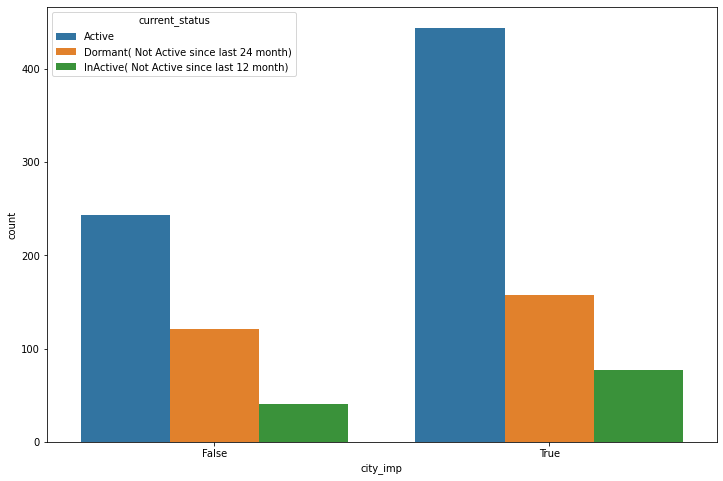

In [64]:
plt.figure(figsize=(12,8))
sns.countplot(data=df3,x='city_imp',hue='current_status')


In [65]:
df3['distance'].max() # 30000 - max #0 - min


30000.0

In [66]:
bins = [0,10,30,1000,30000]
labels = ['near','intercity','interstate','abroad']


In [67]:
df3['dist_bin'] = pd.cut(df3['distance'],bins=bins,labels=labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 1083 non-null   object  
 1   Age                    1083 non-null   int64   
 2   education              1083 non-null   object  
 3   Occupation             1083 non-null   object  
 4   act_type               1083 non-null   object  
 5   City                   1083 non-null   object  
 6   Branch                 1083 non-null   object  
 7   crnt_city              1083 non-null   object  
 8   distance               1083 non-null   float64 
 9   op_blnce               1083 non-null   int64   
 10  min_blnce              1083 non-null   object  
 11  crnt_blnce             1083 non-null   float64 
 12  3m_trans               1083 non-null   float64 
 13  multiple_acnts         1083 non-null   object  
 14  active_loan            1083 non-null   o

In [69]:
df3['dist_bin'].value_counts()

near          716
intercity     191
interstate    143
abroad         18
Name: dist_bin, dtype: int64

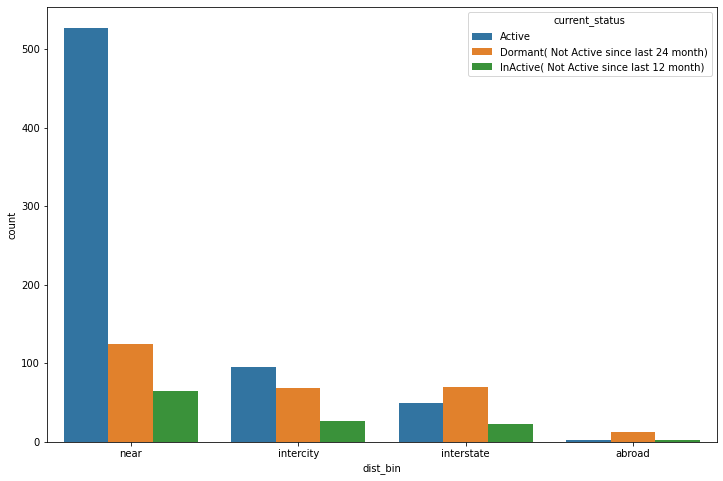

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(data=df3,x='dist_bin',hue='current_status')


#"""# Exploring and implimenting  Outlier Cleaning Methods:"""

In [71]:
df3.describe()

,Age,distance,op_blnce,crnt_blnce,3m_trans,months_frm_last,target
count,1083.000000,1083.000000,1.083000e+03,1.083000e+03,1083.000000,1083.000000,1083.000000
mean,32.791320,123.849492,2.197894e+06,7.396457e+09,206.459834,14.633887,0.474608
std,13.942675,1137.063237,7.182643e+07,2.430946e+11,2407.537120,23.963660,0.683886
min,10.000000,0.000000,0.000000e+00,-4.000000e+02,0.000000,0.000000,0.000000
25%,24.000000,3.000000,5.000000e+02,7.000000e+02,2.000000,1.000000,0.000000
50%,28.000000,6.000000,1.500000e+03,5.000000e+03,10.000000,2.000000,0.000000
75%,38.000000,15.000000,5.000000e+03,4.845000e+04,12.000000,25.000000,1.000000
max,107.000000,30000.000000,2.363747e+09,8.000000e+12,44415.000000,254.000000,2.000000


In [72]:
q1 = np.quantile(df3['Age'],0.25)
q3 = np.quantile(df3['Age'],0.75)
iqr = q3 - q1
print('IQR:',iqr)
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1- cut_off, q3 + cut_off

print('lower_bound',lower)
print('upper_bound',upper)


IQR: 14.0
lower_bound 3.0
upper_bound 59.0


In [73]:

df3['Age'].max()

107

In [74]:
print(df3['Age'].quantile(0.50)) 
print(df3['Age'].quantile(0.95))

28.0
64.69999999999959


In [75]:
df_outs = df3[num_cols]

In [76]:
df_outs.head()

,Age,distance,op_blnce,crnt_blnce,3m_trans,months_frm_last
0,23,300.0,2000,2000.0,2.0,3.0
1,40,10.0,10000,15000.0,30.0,2.0
2,32,825.0,500,623.0,7.0,46.0
3,23,20.0,0,1000.0,5.0,3.0
4,40,1.0,3000,1000.0,5.0,9.0


In [77]:
df_outs.describe()

,Age,distance,op_blnce,crnt_blnce,3m_trans,months_frm_last
count,1083.000000,1083.000000,1.083000e+03,1.083000e+03,1083.000000,1083.000000
mean,32.791320,123.849492,2.197894e+06,7.396457e+09,206.459834,14.633887
std,13.942675,1137.063237,7.182643e+07,2.430946e+11,2407.537120,23.963660
min,10.000000,0.000000,0.000000e+00,-4.000000e+02,0.000000,0.000000
25%,24.000000,3.000000,5.000000e+02,7.000000e+02,2.000000,1.000000
50%,28.000000,6.000000,1.500000e+03,5.000000e+03,10.000000,2.000000
75%,38.000000,15.000000,5.000000e+03,4.845000e+04,12.000000,25.000000
max,107.000000,30000.000000,2.363747e+09,8.000000e+12,44415.000000,254.000000


In [78]:
from scipy import stats

In [79]:
df3["Age"].max()

107

In [80]:
np.quantile(df3['Age'],0.50)

28.0

In [81]:

def bounds(col):

  print('Min Value:',col.min())
  print('Max Value:',col.max())
  q_item_25 = np.quantile(col,0.25)
  q_item_75 = np.quantile(col,0.75)
  iqr_item = q_item_75-q_item_25
  print('IQR:',iqr_item)
  print('\n')
  # calculate the outlier cutoff
  cut_off = iqr_item * 1.5
  lower_bound, upper_bound = q_item_25- cut_off, q_item_75 + cut_off
  print('lower_bound:',lower_bound)
  print('upper_bound:',upper_bound)
  print('\n')
  print('5th_percentile:',np.quantile(col,0.05))
  print('Mean:',col.mean())
  print('95th_percentile:',np.quantile(col,0.95))
  print('\n')
  print('STD:',col.std())
  std = col.std()
  std_uf = col.mean()+(3*std)
  std_lf = col.mean()-(3*std)
  print('std_lower_bound:',std_lf)
  print('std_upper_bound:',std_uf)
  print('\n')
  print('Median:',np.quantile(col,0.50))
  mad = stats.median_absolute_deviation(col)
  print('Median_abs_dev:',mad)
  median = np.quantile(col,0.50)
  mad_uf = median+(3*mad)
  mad_lf = median-(3*mad)
  print('mad_lower_bound:',mad_lf)
  print('mad_upper_bound:',mad_uf)
  print('--------')




In [82]:
print('Age:')
bounds(df_outs['Age'])
print('\n')
print('Distance:')
bounds(df_outs['distance'])
print('\n')
print('op_balance:')
bounds(df_outs['op_blnce'])
print('\n')
print('current_balance:')
bounds(df_outs['crnt_blnce'])
print('\n')
print('Quarterly_trans:')
bounds(df_outs['3m_trans'])
print('\n')
print('months_from_last:')
bounds(df_outs['months_frm_last'])

Age:
Min Value: 10
Max Value: 107
IQR: 14.0


lower_bound: 3.0
upper_bound: 59.0


5th_percentile: 19.0
Mean: 32.79132040627886
95th_percentile: 64.69999999999959


STD: 13.942675032859322
std_lower_bound: -9.03670469229911
std_upper_bound: 74.61934550485682


Median: 28.0
Median_abs_dev: 8.8956
mad_lower_bound: 1.313200000000002
mad_upper_bound: 54.6868
--------


Distance:
Min Value: 0.0
Max Value: 30000.0
IQR: 12.0


lower_bound: -15.0
upper_bound: 33.0


5th_percentile: 1.0
Mean: 123.8494921514312
95th_percentile: 508.99999999999864


STD: 1137.063236807151
std_lower_bound: -3287.340218270022
std_upper_bound: 3535.0392025728843


Median: 6.0
Median_abs_dev: 5.9304
mad_lower_bound: -11.7912
mad_upper_bound: 23.7912
--------


op_balance:
Min Value: 0
Max Value: 2363747484
IQR: 4500.0


lower_bound: -6250.0
upper_bound: 11750.0


5th_percentile: 0.0
Mean: 2197894.3148661125
95th_percentile: 50000.0


STD: 71826432.5425856
std_lower_bound: -213281403.31289065
std_upper_bound: 21767719

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.



In [83]:
"""### Using Median Abs Deviation 
### We are replacing values greater than mad_upper_bound with mad_upper_bound
### We are replacing values less than mad_lower_bound with mad_lower_bound
"""

'### Using Median Abs Deviation \n### We are replacing values greater than mad_upper_bound with mad_upper_bound\n### We are replacing values less than mad_lower_bound with mad_lower_bound\n'

In [84]:
df_outs['Age'] = np.where(df_outs['Age'] > 46, 46, df_outs['Age'])
df_outs['Age'] = np.where(df_outs['Age'] < 10, 10, df_outs['Age'])
df_outs['distance'] = np.where(df_outs['distance'] > 18, 18, df_outs['distance'])
df_outs['op_blnce'] = np.where(df_outs['op_blnce'] > 4500, 4500, df_outs['op_blnce'])
df_outs['crnt_blnce'] = np.where(df_outs['crnt_blnce'] > 20000, 20000, df_outs['crnt_blnce'])
df_outs['3m_trans'] = np.where(df_outs['3m_trans'] > 31, 31, df_outs['3m_trans'])
df_outs['months_frm_last'] = np.where(df_outs['months_frm_last'] > 5, 5, df_outs['months_frm_last'])
df_outs.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Age,distance,op_blnce,crnt_blnce,3m_trans,months_frm_last
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,30.567867,8.464451,2193.761773,9154.403509,10.000000,2.707295
std,9.150910,6.351924,1761.515272,8629.478842,9.655527,1.882945
min,10.000000,0.000000,0.000000,-400.000000,0.000000,0.000000
25%,24.000000,3.000000,500.000000,700.000000,2.000000,1.000000
50%,28.000000,6.000000,1500.000000,5000.000000,10.000000,2.000000
75%,38.000000,15.000000,4500.000000,20000.000000,12.000000,5.000000
max,46.000000,18.000000,4500.000000,20000.000000,31.000000,5.000000


In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 1083 non-null   object  
 1   Age                    1083 non-null   int64   
 2   education              1083 non-null   object  
 3   Occupation             1083 non-null   object  
 4   act_type               1083 non-null   object  
 5   City                   1083 non-null   object  
 6   Branch                 1083 non-null   object  
 7   crnt_city              1083 non-null   object  
 8   distance               1083 non-null   float64 
 9   op_blnce               1083 non-null   int64   
 10  min_blnce              1083 non-null   object  
 11  crnt_blnce             1083 non-null   float64 
 12  3m_trans               1083 non-null   float64 
 13  multiple_acnts         1083 non-null   object  
 14  active_loan            1083 non-null   o

* explored isolation forest for outlier handing 
  * """### Isolation Forest:"""

df_if = df3[num_cols]

df_if.info()

df_if

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

if_clf = IsolationForest(contamination=0.1)

if_clf.fit(df_if)

new_df_if = pd.DataFrame()

new_df_if['scores']=if_clf.decision_function(df_if)
new_df_if['anomaly_Value']=if_clf.predict(df_if)
new_df_if = pd.concat([df_if,new_df_if],axis=1)

new_df_if['anomaly_Value'].value_counts()


In [86]:
df4 = df3.drop(num_cols,axis=1)

In [87]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 1083 non-null   object  
 1   education              1083 non-null   object  
 2   Occupation             1083 non-null   object  
 3   act_type               1083 non-null   object  
 4   City                   1083 non-null   object  
 5   Branch                 1083 non-null   object  
 6   crnt_city              1083 non-null   object  
 7   min_blnce              1083 non-null   object  
 8   multiple_acnts         1083 non-null   object  
 9   active_loan            1083 non-null   object  
 10  int_banking            1083 non-null   object  
 11  credit_card            1083 non-null   object  
 12  susp_trans             1083 non-null   object  
 13  loan_default           1083 non-null   object  
 14  cust_ser_satisfaction  1083 non-null   o

In [88]:
to_drop02 = ['dist_bin','Branch','current_status','City','crnt_city']

In [89]:
df5 = df4.drop(to_drop02,axis=1)

In [90]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1083 non-null   object
 1   education              1083 non-null   object
 2   Occupation             1083 non-null   object
 3   act_type               1083 non-null   object
 4   min_blnce              1083 non-null   object
 5   multiple_acnts         1083 non-null   object
 6   active_loan            1083 non-null   object
 7   int_banking            1083 non-null   object
 8   credit_card            1083 non-null   object
 9   susp_trans             1083 non-null   object
 10  loan_default           1083 non-null   object
 11  cust_ser_satisfaction  1083 non-null   object
 12  service_calls_rec      1083 non-null   object
 13  24m_trans              1083 non-null   object
 14  recent_closed_loan     1083 non-null   object
 15  demat_acnt           

In [91]:
df5.head()

,Gender,education,Occupation,act_type,min_blnce,multiple_acnts,active_loan,int_banking,credit_card,susp_trans,loan_default,cust_ser_satisfaction,service_calls_rec,24m_trans,recent_closed_loan,demat_acnt,target,city_imp
0,Male,Graduate,Salaried,Savings,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,0,False
1,Male,Post Graduate,Salaried,Savings,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,0,True
2,Male,Post Graduate,Salaried,Salaried,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No,No,1,False
3,Male,Graduate,Student,Savings,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,0,True
4,Female,Doctrate,Business,Savings,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,0,True


In [92]:
df5.columns

Index(['Gender', 'education', 'Occupation', 'act_type', 'min_blnce',
       'multiple_acnts', 'active_loan', 'int_banking', 'credit_card',
       'susp_trans', 'loan_default', 'cust_ser_satisfaction',
       'service_calls_rec', '24m_trans', 'recent_closed_loan', 'demat_acnt',
       'target', 'city_imp'],
      dtype='object')

In [93]:
df_outs.head()

,Age,distance,op_blnce,crnt_blnce,3m_trans,months_frm_last
0,23,18.0,2000,2000.0,2.0,3.0
1,40,10.0,4500,15000.0,30.0,2.0
2,32,18.0,500,623.0,7.0,5.0
3,23,18.0,0,1000.0,5.0,3.0
4,40,1.0,3000,1000.0,5.0,5.0


In [94]:
df_outs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1083 non-null   int64  
 1   distance         1083 non-null   float64
 2   op_blnce         1083 non-null   int64  
 3   crnt_blnce       1083 non-null   float64
 4   3m_trans         1083 non-null   float64
 5   months_frm_last  1083 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 99.2 KB


In [95]:
from scipy import stats

<Figure size 1152x576 with 0 Axes>

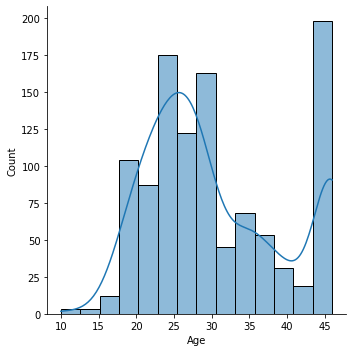

<Figure size 1152x576 with 0 Axes>

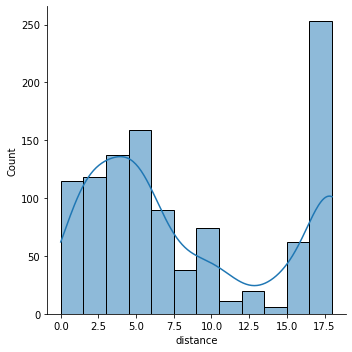

<Figure size 1152x576 with 0 Axes>

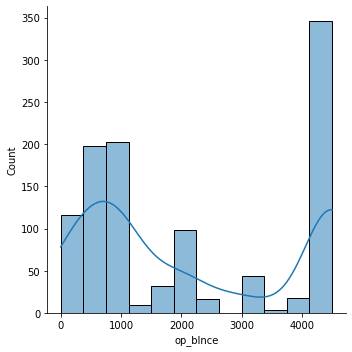

<Figure size 1152x576 with 0 Axes>

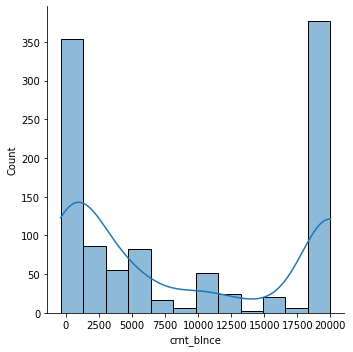

<Figure size 1152x576 with 0 Axes>

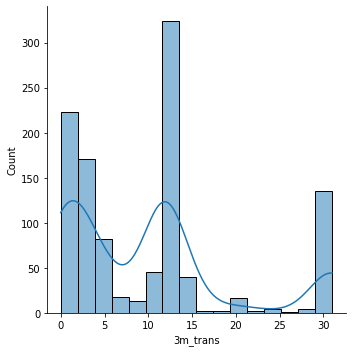

<Figure size 1152x576 with 0 Axes>

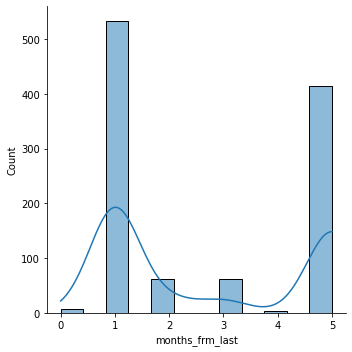

In [96]:
###chek for normality by ploting 
for i in df_outs.columns:
  plt.figure(figsize=(16,8))
  sns.displot(data = df_outs, x=i,kde=True)

In [97]:
df_out02 = pd.DataFrame()

In [98]:
bins2 = [0,30,45,60,65]
labels2 = ['<30','30-45','45-60','>60']
df_out02['Age_bin'] = pd.cut(df3['Age'],bins=bins2,labels=labels2)

In [99]:
bins3 = [0,750,1500,2500,50100]
labels3 = ['<750','750-1500','1.5k-2.5k','>2.5k']
df_out02['op_blnce_bin'] = pd.cut(df3['op_blnce'],bins=bins3,labels=labels3)

In [100]:
bins4 = [-400,1000,2500,7500,704165]
labels4 = ['<1000','1K-2.5K','2.5K-7.5K','>7.5K']
df_out02['crnt_blnce_bin'] = pd.cut(df3['crnt_blnce'],bins=bins4,labels=labels4)

In [101]:
bins5 = [0,5,15,60]
labels5 = ['<5','5-15','>15']
df_out02['Quart_act_bin'] = pd.cut(df3['3m_trans'],bins=bins5,labels=labels5)

In [102]:
bins6 = [0,3,7,12,20,501]
labels6 = ['<3','3-7','7-12','12-20','>20']
df_out02['Dist_bin'] = pd.cut(df3['distance'],bins=bins6,labels=labels6)

In [103]:
bins7 = [0,6,12,24]
labels7 = ['<6','6-24','>24']
df_out02['months_frm_last'] = pd.cut(df3['months_frm_last'],bins=bins7,labels=labels7)

In [104]:
df_out02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age_bin          1039 non-null   category
 1   op_blnce_bin     924 non-null    category
 2   crnt_blnce_bin   1028 non-null   category
 3   Quart_act_bin    832 non-null    category
 4   Dist_bin         1013 non-null   category
 5   months_frm_last  802 non-null    category
dtypes: category(6)
memory usage: 15.8 KB


In [105]:
df_out02.head()

,Age_bin,op_blnce_bin,crnt_blnce_bin,Quart_act_bin,Dist_bin,months_frm_last
0,<30,1.5k-2.5k,1K-2.5K,<5,>20,<6
1,30-45,>2.5k,>7.5K,>15,7-12,<6
2,30-45,<750,<1000,5-15,NaN,NaN
3,<30,NaN,<1000,<5,12-20,<6
4,30-45,>2.5k,<1000,<5,<3,6-24


In [106]:
df_out02['Age_bin'].fillna('<30',inplace=True)
df_out02['op_blnce_bin'].fillna('<750',inplace=True)
df_out02['crnt_blnce_bin'].fillna('<1000',inplace=True)
df_out02['Quart_act_bin'].fillna('<5',inplace=True)
df_out02['Dist_bin'].fillna('<3',inplace=True)
df_out02['months_frm_last'].fillna('<6',inplace=True)
df_out02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age_bin          1083 non-null   category
 1   op_blnce_bin     1083 non-null   category
 2   crnt_blnce_bin   1083 non-null   category
 3   Quart_act_bin    1083 non-null   category
 4   Dist_bin         1083 non-null   category
 5   months_frm_last  1083 non-null   category
dtypes: category(6)
memory usage: 15.8 KB


In [107]:
df_out02['target'] = df5['target']

In [108]:
df_out02.isnull().sum()

Age_bin            0
op_blnce_bin       0
crnt_blnce_bin     0
Quart_act_bin      0
Dist_bin           0
months_frm_last    0
target             0
dtype: int64

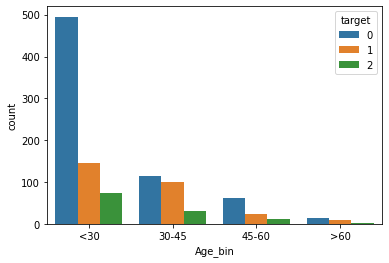

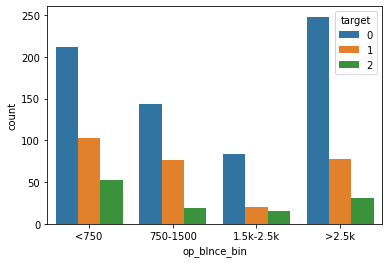

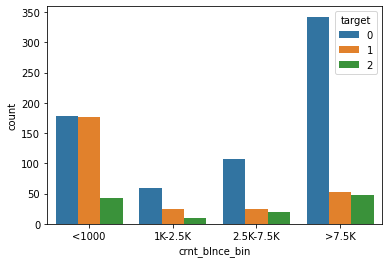

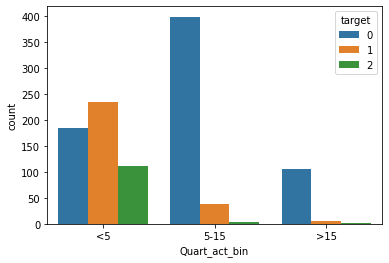

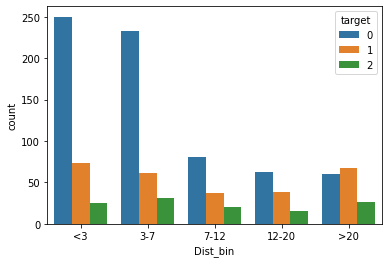

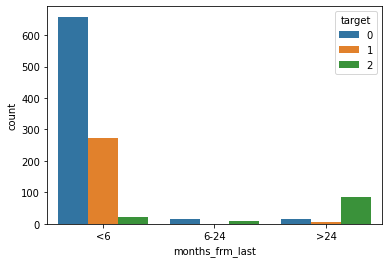

In [109]:
for item in df_out02.columns[:-1]:
  sns.countplot(data=df_out02,x=item,hue='target')
  plt.show()

In [110]:
df5.dtypes.value_counts()

object    16
int64      1
bool       1
dtype: int64

In [111]:
df5.columns

Index(['Gender', 'education', 'Occupation', 'act_type', 'min_blnce',
       'multiple_acnts', 'active_loan', 'int_banking', 'credit_card',
       'susp_trans', 'loan_default', 'cust_ser_satisfaction',
       'service_calls_rec', '24m_trans', 'recent_closed_loan', 'demat_acnt',
       'target', 'city_imp'],
      dtype='object')

# data preprocessing 

In [112]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler

In [113]:
to_encode = df5[['Gender','education', 'Occupation', 'act_type', 'min_blnce', 'multiple_acnts','active_loan',
                'int_banking', 'credit_card', 'loan_default','cust_ser_satisfaction','24m_trans']]


In [114]:
encoded_df = pd.get_dummies(to_encode,drop_first=True)

In [115]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Gender_Male                      1083 non-null   uint8
 1   Gender_Transgender               1083 non-null   uint8
 2   Gender_male                      1083 non-null   uint8
 3   education_12th                   1083 non-null   uint8
 4   education_Doctrate               1083 non-null   uint8
 5   education_Graduate               1083 non-null   uint8
 6   education_Post Graduate          1083 non-null   uint8
 7   education_graduate               1083 non-null   uint8
 8   Occupation_Artist                1083 non-null   uint8
 9   Occupation_Business              1083 non-null   uint8
 10  Occupation_Farmer                1083 non-null   uint8
 11  Occupation_Freelancer            1083 non-null   uint8
 12  Occupation_Homemaker             1083 non-null  

In [116]:
encoded_df.head()

,Gender_Male,Gender_Transgender,Gender_male,education_12th,education_Doctrate,education_Graduate,education_Post Graduate,education_graduate,Occupation_Artist,Occupation_Business,Occupation_Farmer,Occupation_Freelancer,Occupation_Homemaker,Occupation_Intern,Occupation_Not working,Occupation_Other,Occupation_Politician,Occupation_Retired,Occupation_Salaried,Occupation_Student,Occupation_student,act_type_Current,act_type_New Frill Account,act_type_Other,act_type_Pension,act_type_Salaried,act_type_Savings,act_type_Senior Citizen Account,act_type_savings,min_blnce_Yes,multiple_acnts_Yes,active_loan_Yes,int_banking_Yes,credit_card_No,credit_card_Yes,loan_default_Yes,cust_ser_satisfaction_No,cust_ser_satisfaction_Yes,cust_ser_satisfaction_yes,24m_trans_Yes
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1


In [117]:
to_scale = df_outs #df4[['Age','distance', 'op_blnce','crnt_blnce', '3m_trans',]]

In [118]:
final_df1 = pd.concat([encoded_df,to_scale,df5['target']],axis=1)

In [119]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1089
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender_Male                      1083 non-null   uint8  
 1   Gender_Transgender               1083 non-null   uint8  
 2   Gender_male                      1083 non-null   uint8  
 3   education_12th                   1083 non-null   uint8  
 4   education_Doctrate               1083 non-null   uint8  
 5   education_Graduate               1083 non-null   uint8  
 6   education_Post Graduate          1083 non-null   uint8  
 7   education_graduate               1083 non-null   uint8  
 8   Occupation_Artist                1083 non-null   uint8  
 9   Occupation_Business              1083 non-null   uint8  
 10  Occupation_Farmer                1083 non-null   uint8  
 11  Occupation_Freelancer            1083 non-null   uint8  
 12  Occupation_Homemaker

In [120]:
final_df1.to_csv('final_df1.csv')

In [121]:
final_df1.head()

,Gender_Male,Gender_Transgender,Gender_male,education_12th,education_Doctrate,education_Graduate,education_Post Graduate,education_graduate,Occupation_Artist,Occupation_Business,Occupation_Farmer,Occupation_Freelancer,Occupation_Homemaker,Occupation_Intern,Occupation_Not working,Occupation_Other,Occupation_Politician,Occupation_Retired,Occupation_Salaried,Occupation_Student,Occupation_student,act_type_Current,act_type_New Frill Account,act_type_Other,act_type_Pension,act_type_Salaried,act_type_Savings,act_type_Senior Citizen Account,act_type_savings,min_blnce_Yes,multiple_acnts_Yes,active_loan_Yes,int_banking_Yes,credit_card_No,credit_card_Yes,loan_default_Yes,cust_ser_satisfaction_No,cust_ser_satisfaction_Yes,cust_ser_satisfaction_yes,24m_trans_Yes,Age,distance,op_blnce,crnt_blnce,3m_trans,months_frm_last,target
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,1,23,18.0,2000,2000.0,2.0,3.0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,40,10.0,4500,15000.0,30.0,2.0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,32,18.0,500,623.0,7.0,5.0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,23,18.0,0,1000.0,5.0,3.0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,40,1.0,3000,1000.0,5.0,5.0,0


In [122]:
df4['current_status'].value_counts()

Active                                       687
Dormant( Not Active since last 24 month)     278
InActive( Not Active since last 12 month)    118
Name: current_status, dtype: int64

In [124]:
final_df1['target'].value_counts()

0    687
1    278
2    118
Name: target, dtype: int64

# Data prepairing 

In [125]:
y = final_df1['target']

In [126]:
X = final_df1.drop(['target'],axis=1)

In [ ]:
X.info()

# spliting data in to training and tesing 

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)


In [129]:
scaler = StandardScaler() #MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# building a MODEL using Lazy predict 

In [130]:
!pip install Lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [131]:
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [132]:
models,predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:03<00:00,  9.20it/s]


In [133]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.89,None,0.94,0.27
LGBMClassifier,0.93,0.88,None,0.93,0.24
ExtraTreesClassifier,0.94,0.88,None,0.94,0.19
LinearSVC,0.92,0.87,None,0.92,0.23
LinearDiscriminantAnalysis,0.88,0.86,None,0.89,0.04
LogisticRegression,0.90,0.86,None,0.90,0.06
DecisionTreeClassifier,0.90,0.85,None,0.90,0.02
RidgeClassifierCV,0.90,0.85,None,0.90,0.03
RidgeClassifier,0.90,0.85,None,0.90,0.02


# build a mdoel random forest 

* import the required library and function for building 

In [136]:
!pip install catboost

     |████████████████████████████████| 67.3MB 51kB/s 


In [137]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score,multilabel_confusion_matrix, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from catboost import CatBoostClassifier

In [138]:
###RandomForest classifier 
rf_clf = RandomForestClassifier(bootstrap=False,criterion= 'entropy', max_depth=16, max_features= 'sqrt',
                                min_samples_leaf= 4, min_samples_split= 10, n_estimators= 600)


In [139]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16,
                       max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=600)

In [140]:
pred_p = rf_clf.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test, rf_clf.predict(X_test))
accuracy_score(y_test, rf_clf.predict(X_test))

0.9263803680981595

* evaluvate on train and test 

In [142]:
cm_clf = confusion_matrix(y_test,pred_p)
cr_clf = classification_report(y_test,pred_p)
accuracy_clf = accuracy_score(y_test,pred_p)



In [143]:

print("Confusion Matrix:")
print(cm_clf)
print('\n')
print("Classification Report:")
print(cr_clf)
print('\n')
print("Accuracy:")
print(accuracy_clf)


Confusion Matrix:
[[102   0   1]
 [  5  36   1]
 [  1   4  13]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.90      0.86      0.88        42
           2       0.87      0.72      0.79        18

    accuracy                           0.93       163
   macro avg       0.90      0.86      0.88       163
weighted avg       0.92      0.93      0.92       163



Accuracy:
0.9263803680981595


In [144]:
clf_preds_train = rf_clf.predict(X_train)

cm_train = confusion_matrix(y_train,clf_preds_train)
cr_train = classification_report(y_train,clf_preds_train)
accuracy_train = accuracy_score(y_train,clf_preds_train)


In [145]:
print("Confusion Matrix:")
print(cm_train)
print('\n')
print("Classification Report:")
print(cr_train)
print('\n')
print("Accuracy:")
print(accuracy_train)

Confusion Matrix:
[[579   4   1]
 [ 10 225   1]
 [ 11  20  69]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       584
           1       0.90      0.95      0.93       236
           2       0.97      0.69      0.81       100

    accuracy                           0.95       920
   macro avg       0.95      0.88      0.90       920
weighted avg       0.95      0.95      0.95       920



Accuracy:
0.9489130434782609


# Factor analysis 

In [146]:
scaler = StandardScaler()

In [147]:
X_pca = scaler.fit_transform(X)

In [148]:
X_pca

array([[ 0.76376262, -0.11851137, -0.04301324, ..., -0.82944857,
        -0.82892377,  0.15552267],
       [ 0.76376262, -0.11851137, -0.04301324, ...,  0.67771151,
         2.07230943, -0.37580558],
       [ 0.76376262, -0.11851137, -0.04301324, ..., -0.9890916 ,
        -0.31084641,  1.21817917],
       ...,
       [-1.30930734, -0.11851137, -0.04301324, ...,  1.25738847,
        -0.10361547,  1.21817917],
       [ 0.76376262, -0.11851137, -0.04301324, ..., -0.01790083,
         2.1759249 , -0.90713383],
       [ 0.76376262, -0.11851137, -0.04301324, ..., -1.06131935,
        -1.03615471,  1.21817917]])

In [149]:
from sklearn.decomposition import PCA

In [150]:
pca_test=PCA(n_components=37)

In [151]:
pca_test.fit(X_pca)

PCA(n_components=37)

In [152]:
exp_var = np.cumsum(pca_test.explained_variance_ratio_)

Text(0, 0.5, 'Cummulative Variance')

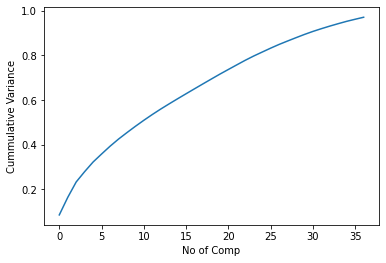

In [153]:
plt.plot(exp_var)
plt.xlabel("No of Comp")
plt.ylabel("Cummulative Variance")

In [154]:
pca_final=PCA(n_components=25)

In [155]:
pca_data = pca_final.fit_transform(X_pca)

In [156]:
print("Explained Variance per principal component {}".format(pca_final.explained_variance_ratio_))
print("Total Exp Variance:",np.sum(pca_final.explained_variance_ratio_))

Explained Variance per principal component [0.08586564 0.07851684 0.06913252 0.04620262 0.0431379  0.03567902
 0.03476238 0.03198209 0.02910578 0.02822301 0.02700183 0.02581393
 0.0245706  0.02331186 0.02280338 0.02239225 0.02223827 0.02208288
 0.0218526  0.02172263 0.02079705 0.02057395 0.02047146 0.01907768
 0.01762491]
Total Exp Variance: 0.8149431058769342


In [157]:
print("Amount of Information Lost {}".format(1-np.sum(pca_final.explained_variance_ratio_)))

Amount of Information Lost 0.1850568941230658


In [158]:
columns = list(range(1,26))
#columns

In [159]:
X_pca_df = pd.DataFrame(pca_data,columns=columns)

In [160]:
X_pca_df.head() # 85% of explained variance using pca

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.63,-0.26,0.28,-1.82,-1.01,0.17,-1.24,0.61,-0.66,-1.23,0.71,0.10,-0.37,0.41,0.59,-0.06,0.17,0.36,0.07,0.05,-0.19,-0.84,0.12,0.84,0.70
1,-2.26,0.22,-0.13,-0.66,0.67,-0.58,-0.08,-1.40,-1.63,-1.58,-0.78,0.79,-0.08,0.50,-0.38,0.25,-0.39,0.71,0.13,0.29,-0.61,0.70,-0.63,-0.12,1.55
2,0.12,-0.90,4.01,-1.93,-1.33,-1.72,0.66,-0.28,-0.77,0.50,0.08,1.25,-0.33,-0.15,0.12,0.02,-0.20,0.11,-0.27,0.02,-0.36,0.56,-0.26,1.39,0.32
3,-0.49,0.18,-1.66,-0.18,-1.95,1.66,0.74,-0.54,-0.28,-0.21,1.18,0.30,-0.12,0.16,0.99,-1.10,0.22,0.31,0.25,-0.09,0.38,-0.87,0.86,-0.51,-0.66
4,-1.75,0.03,0.74,1.70,-1.25,1.27,-0.42,-1.26,1.60,0.07,0.34,-0.83,2.24,-0.84,0.06,0.85,-0.44,-0.67,-0.49,-0.44,0.78,1.78,-1.13,-1.12,-0.81


In [161]:
y_pca = y

In [162]:
y_pca.shape

(1083,)

In [163]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_df.values, y_pca, test_size=0.15, stratify=y_pca, random_state=42)

In [164]:
X_train_pca.shape

(920, 25)

In [165]:
X_train_pca

array([[-0.44101696,  0.31464363, -1.62216309, ..., -0.86755081,
         0.39780885, -0.42955966],
       [-1.41378037, -0.34599972,  2.93365515, ..., -0.06066252,
        -0.72044564,  0.40459676],
       [-0.20258122,  0.49053808, -3.40247598, ..., -0.46096458,
        -0.28748546, -0.1058399 ],
       ...,
       [ 1.6064939 , -0.47383978,  1.91669492, ..., -0.29057383,
         1.0246544 , -1.26466843],
       [-0.89291775,  0.38122421, -1.66235044, ..., -0.41042105,
        -0.41837529,  0.49283524],
       [ 0.03675169, -0.17904405,  0.59537971, ..., -0.3090669 ,
        -0.14741487,  0.7380269 ]])